# Análises dos Dados de Simulações

## Construção do Data Lake

In [2]:
import shutil

exp_dir_paths = {
    'mob-6o-1': './result/mobile/6o/1',
    'mob-6o-2': './result/mobile/6o/2',
    'mob-6o-3': './result/mobile/6o/3',
    'mob-6o-4': './result/mobile/6o/4',
    'mob-csma-1': './result/mobile/rpl-udp-csma/1',
    'mob-csma-2': './result/mobile/rpl-udp-csma/2',
    'mob-csma-3': './result/mobile/rpl-udp-csma/3',
    'mob-csma-4': './result/mobile/rpl-udp-csma/4',
    'mob-tsch-1': './result/mobile/rpl-udp-tsch/1',
    'mob-tsch-2': './result/mobile/rpl-udp-tsch/2',
    'mob-tsch-3': './result/mobile/rpl-udp-tsch/3',
    'mob-tsch-4': './result/mobile/rpl-udp-tsch/4',
    'sta-tsch-1': './result/static/rpl-udp-tsch/1',
    'sta-tsch-2': './result/static/rpl-udp-tsch/2',
    'sta-tsch-3': './result/static/rpl-udp-tsch/3',
    'sta-tsch-4': './result/static/rpl-udp-tsch/4',
    'sta-csma-1': './result/static/rpl-udp-csma/1',
    'sta-csma-2': './result/static/rpl-udp-csma/2',
    'sta-csma-3': './result/static/rpl-udp-csma/3',
    'sta-csma-4': './result/static/rpl-udp-csma/4',
    'mob-tsch-2_2': './result/other/tsch-2'
}

for key, value in exp_dir_paths.items():
    shutil.copy(value + "/cooja_metrics.csv", "./data-lake/" + key + ".csv")

In [3]:
import pandas as pd, pathlib as pl, re

def load_runs(path="data-lake"):
    dfs = []
    for f in pl.Path(path).glob("*.csv"):
        m = f.stem.split('-')
        df = pd.read_csv(f)
        df["type"], df["mac"], df["sim_id"] = m[0], m[1], m[2]
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

data = load_runs()


## Simulações de Redes Estáticas

### Motes em regiões de interferência

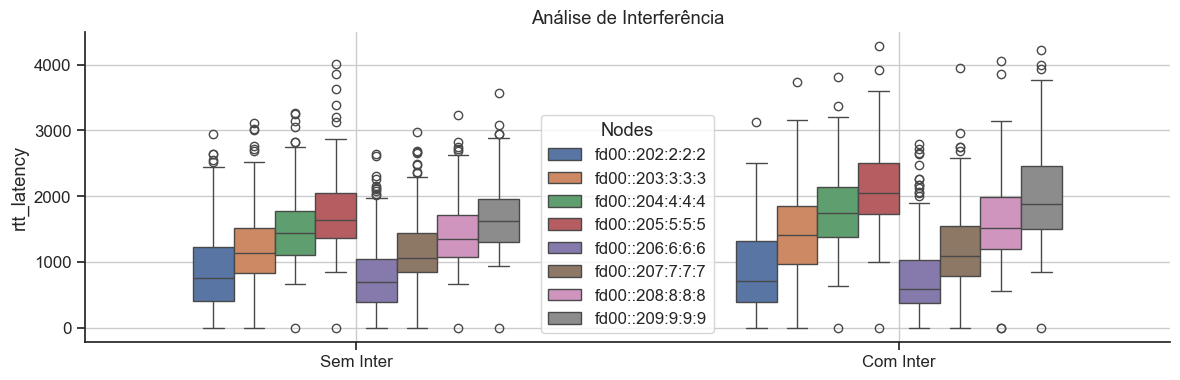

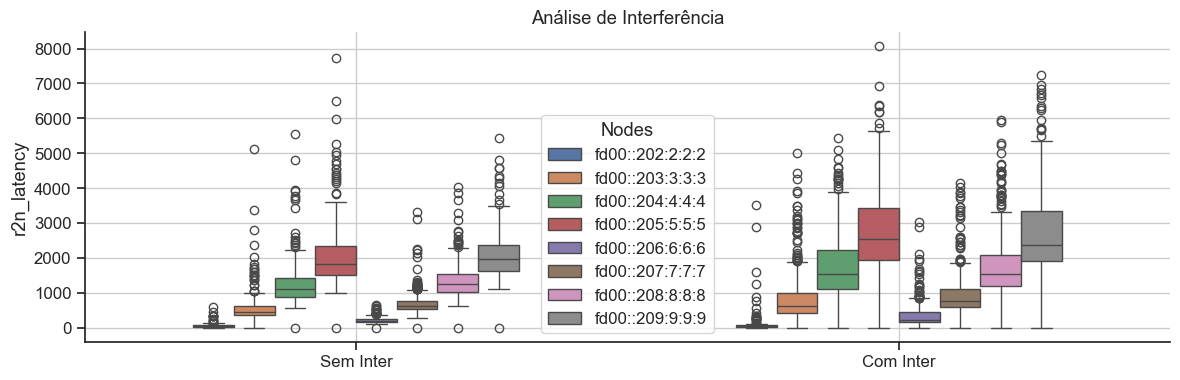

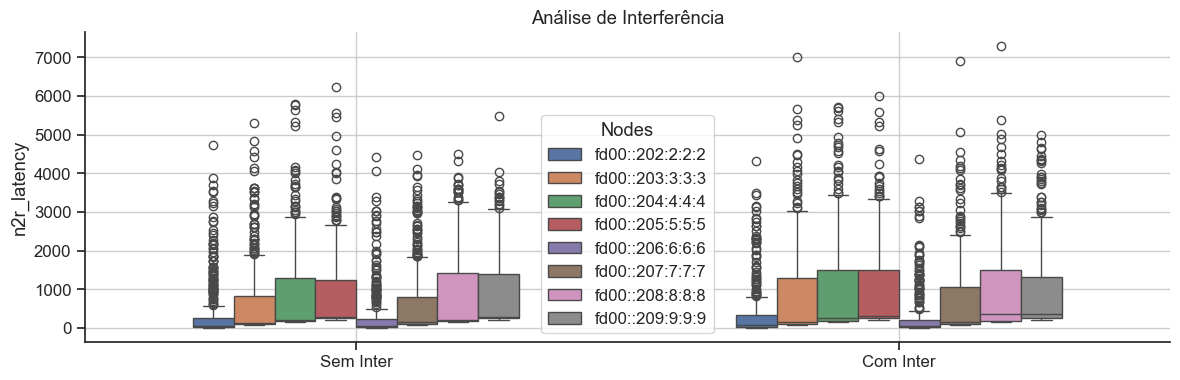

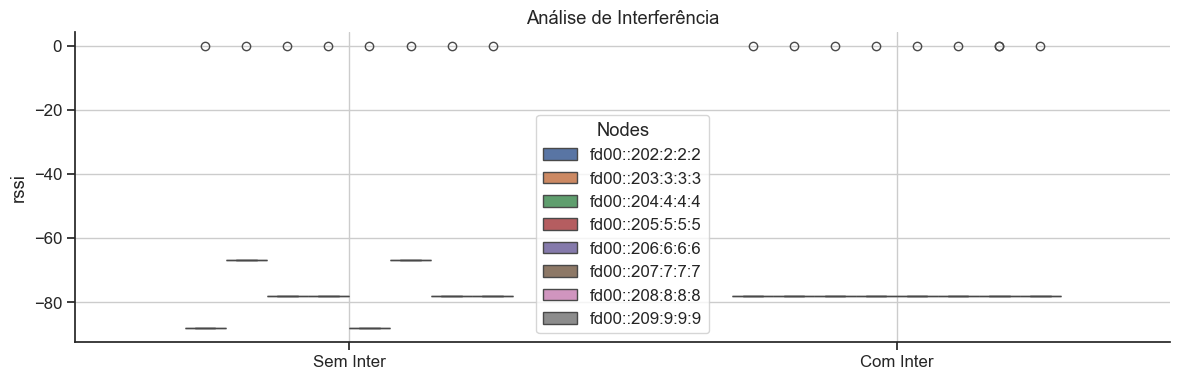

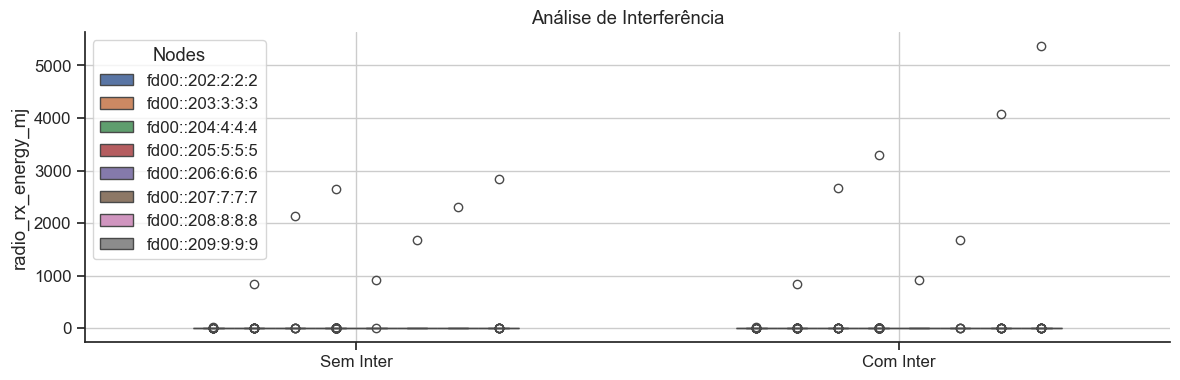

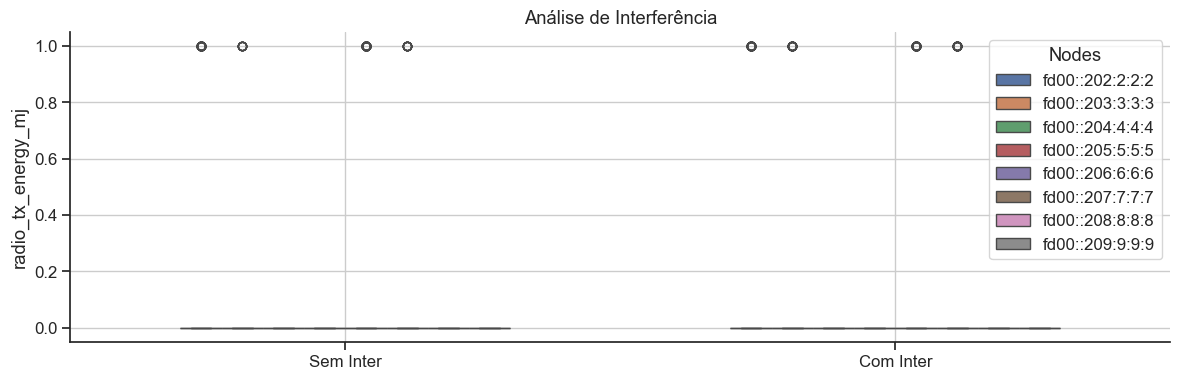

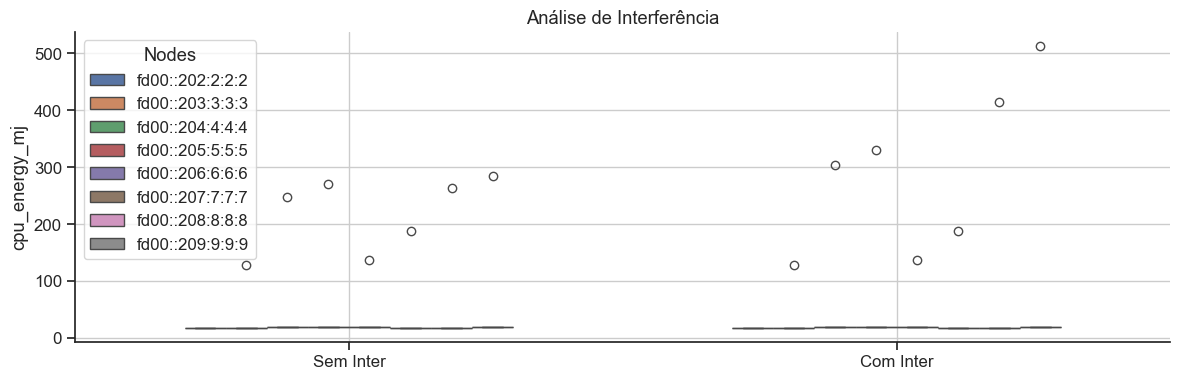

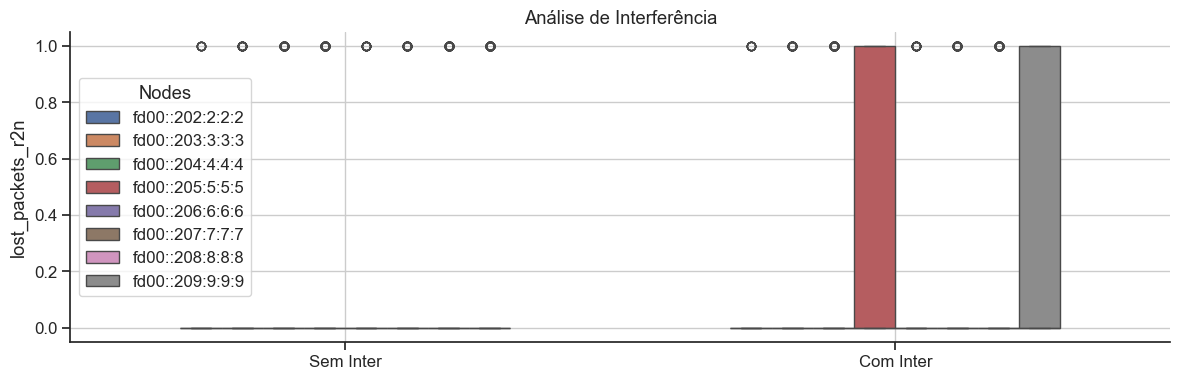

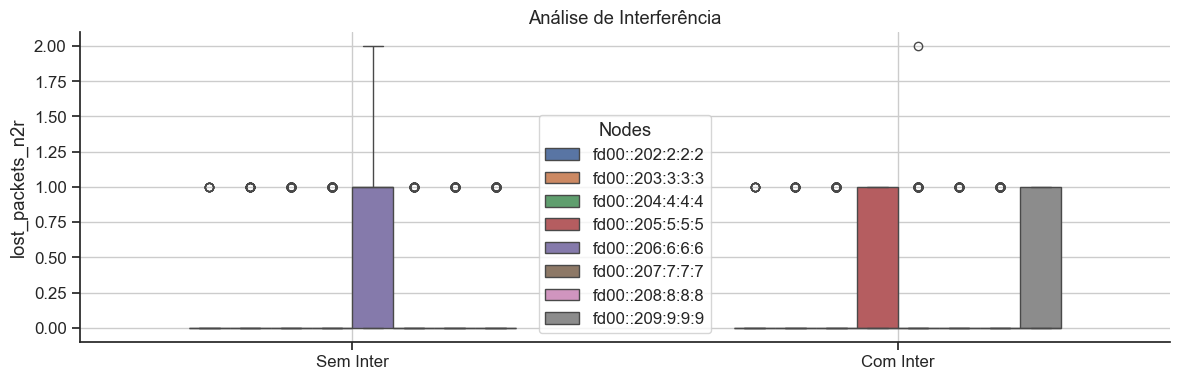

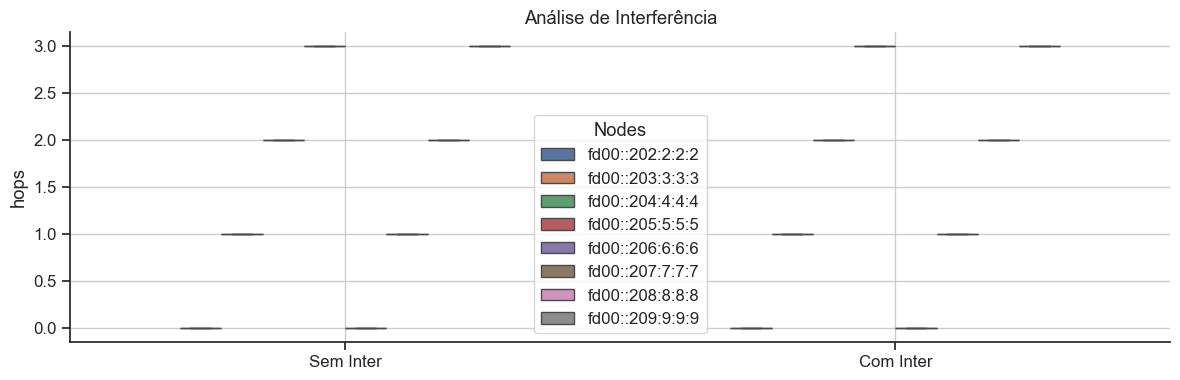

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks", font_scale=1.1)

fdf = data.query("type=='sta' and mac=='tsch' and sim_id in ['1','2']").copy()

fdf['label'] = np.where(fdf['sim_id'] == '1', 'Sem Inter', 'Com Inter')

cols = [
    "rtt_latency",
    "r2n_latency",
    "n2r_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "lost_packets_r2n",
    "lost_packets_n2r",
    "hops",
]

fdf["lost_packets_r2n"] = fdf["server_sent"] - fdf["total_received"] 
fdf["lost_packets_n2r"] = fdf["server_sent"] + fdf["total_sent"] - fdf["server_received"]

for m in cols:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.boxplot(
        data=fdf,
        x="label", y=m, hue="node",
        ax=ax, showcaps=True, width=.6
    )
    ax.set_title("Análise de Interferência")
    ax.set_xlabel("")
    ax.set_ylabel(m)
    ax.legend(title="Nodes")
    ax.grid()
    sns.despine(ax=ax)
    fig.tight_layout()

### Topologia Aberta e Fechada

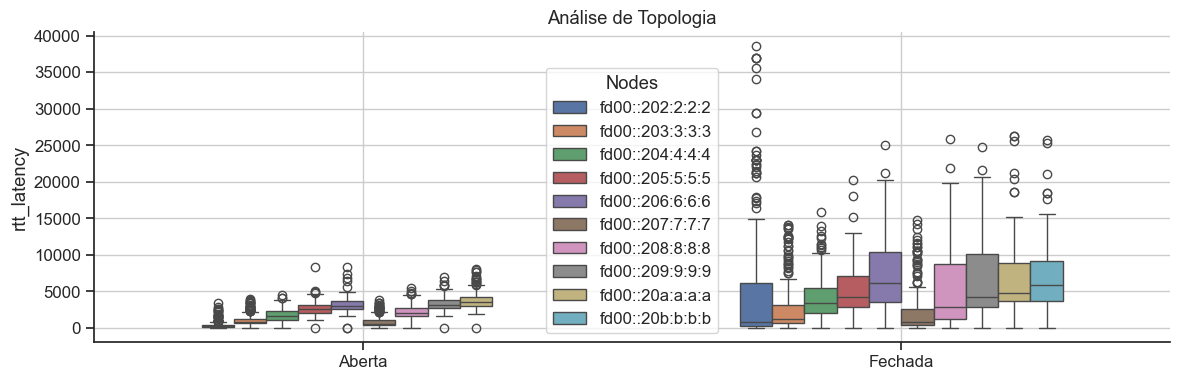

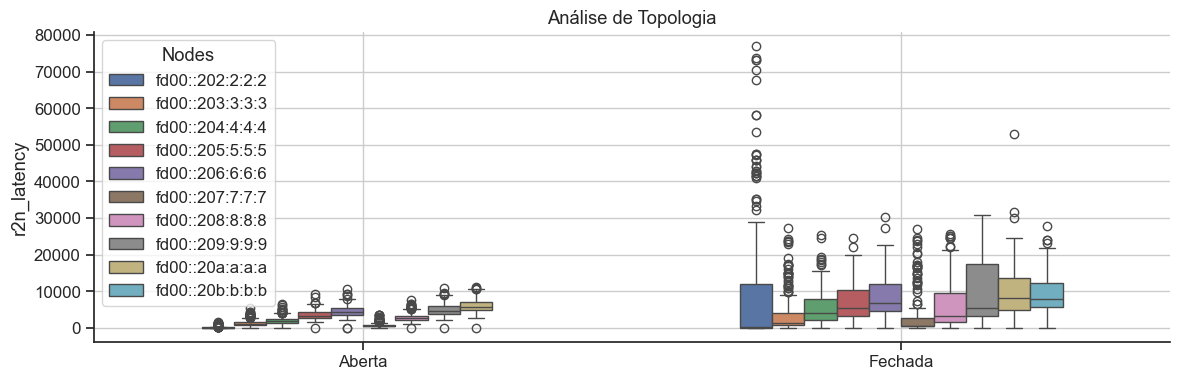

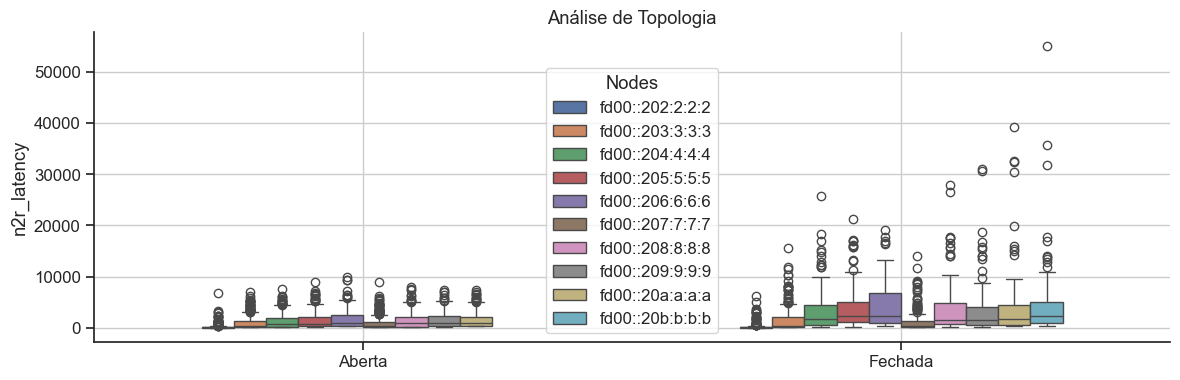

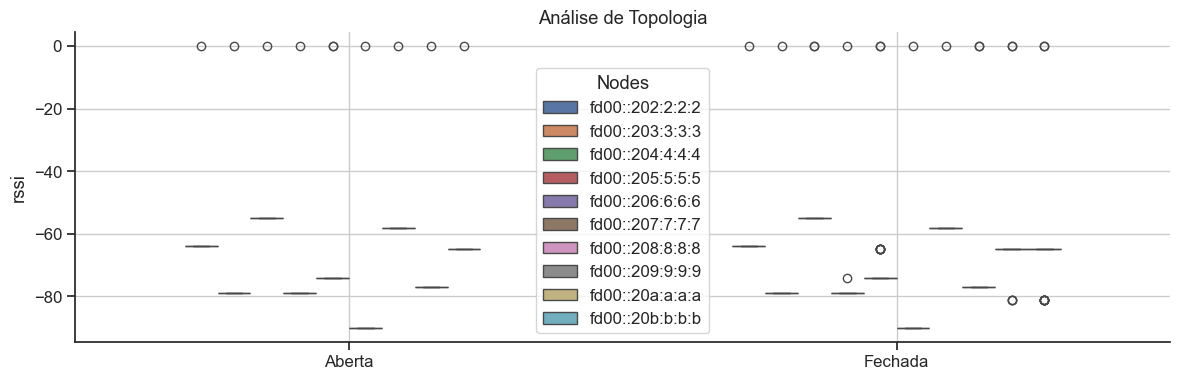

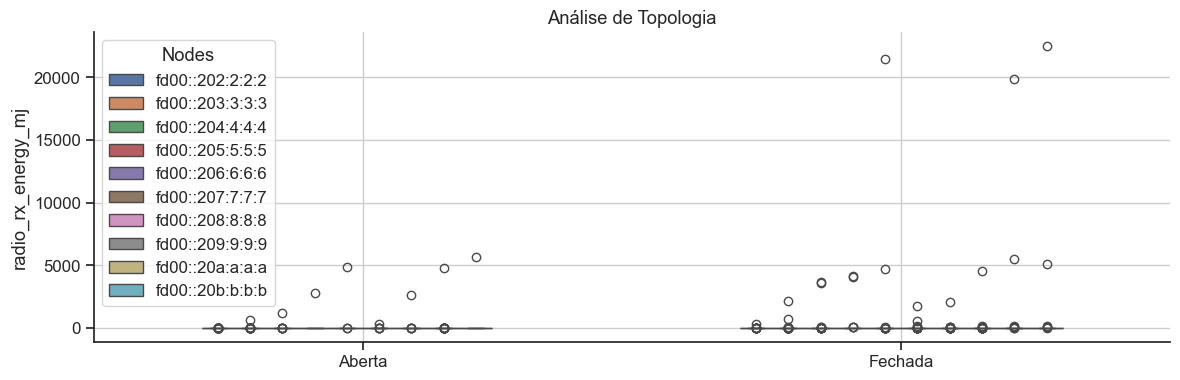

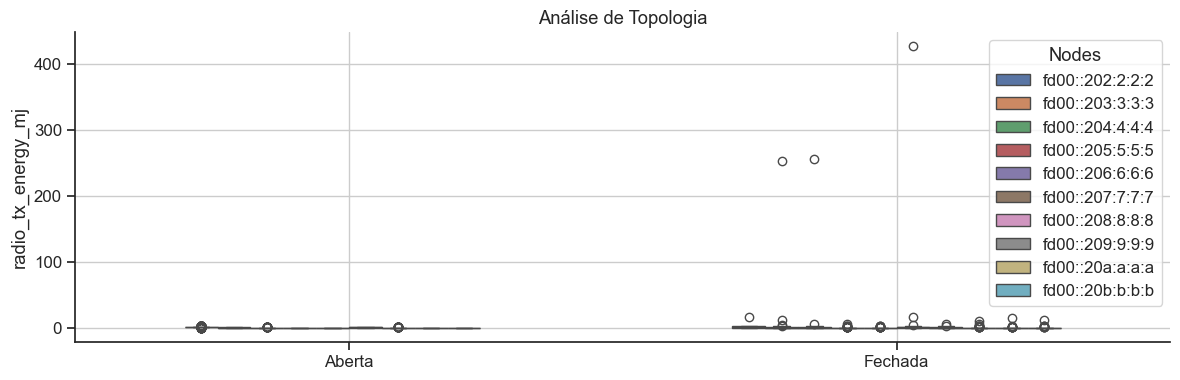

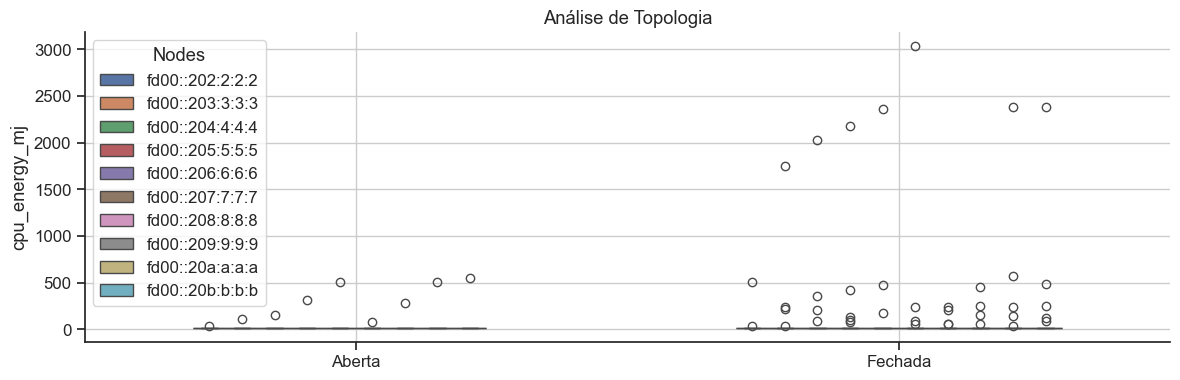

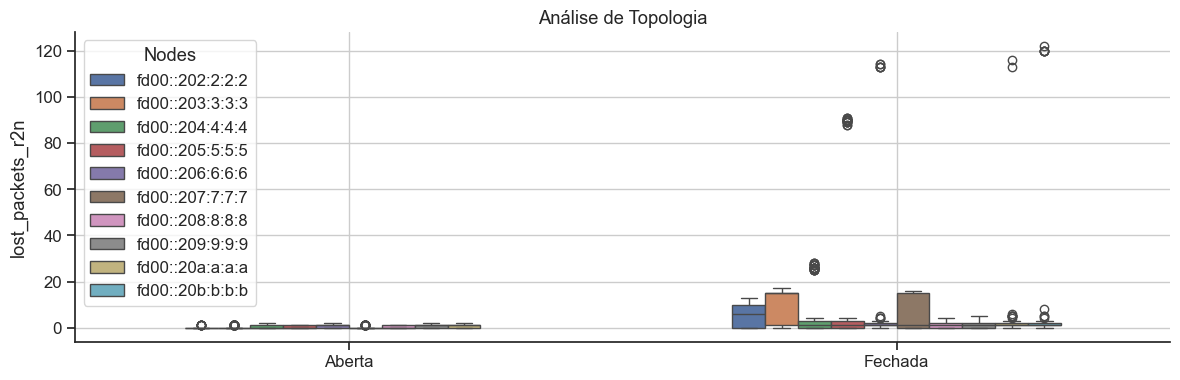

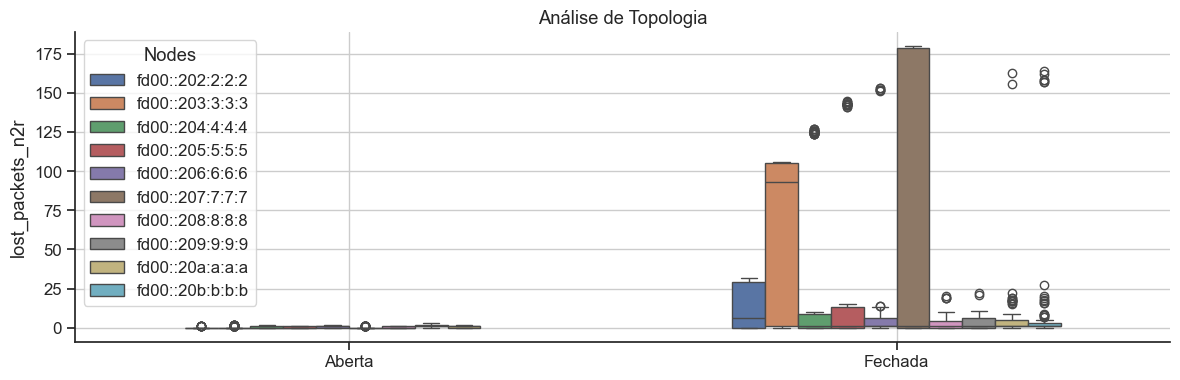

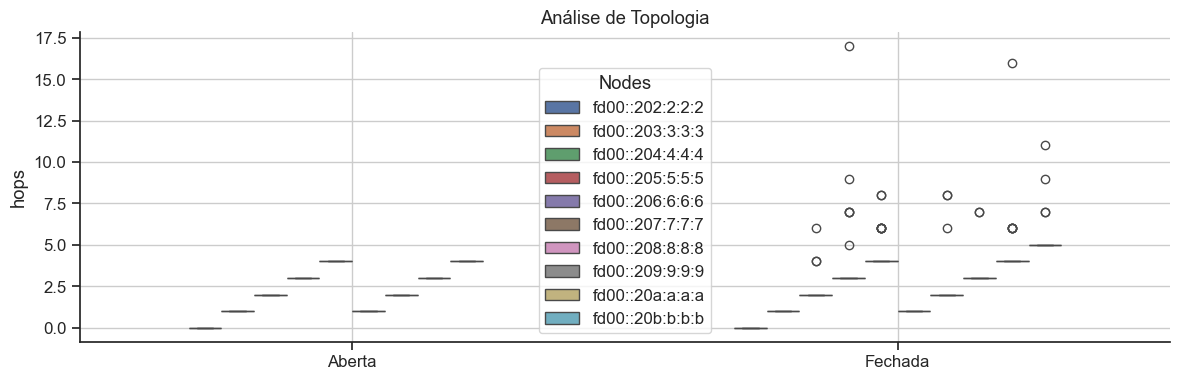

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks", font_scale=1.1)

fdf = data.query("type=='sta' and mac=='tsch' and sim_id in ['3','4']").copy()

fdf['label'] = np.where(fdf['sim_id'] == '3', 'Aberta', 'Fechada')

cols = [
    "rtt_latency",
    "r2n_latency",
    "n2r_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "lost_packets_r2n",
    "lost_packets_n2r",
    "hops",
]

fdf["lost_packets_r2n"] = fdf["server_sent"] - fdf["total_received"] 
fdf["lost_packets_n2r"] = fdf["server_sent"] + fdf["total_sent"] - fdf["server_received"]

for m in cols:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.boxplot(
        data=fdf,
        x="label", y=m, hue="node",
        ax=ax, showcaps=True, width=.6
    )
    ax.set_title("Análise de Topologia")
    ax.set_xlabel("")
    ax.set_ylabel(m)
    ax.legend(title="Nodes")
    ax.grid()
    sns.despine(ax=ax)
    fig.tight_layout()

### Protocolos de Enlace

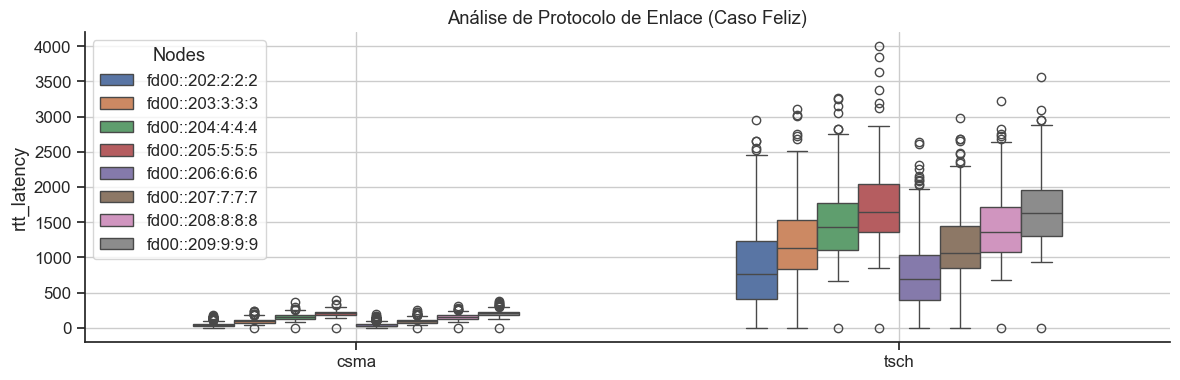

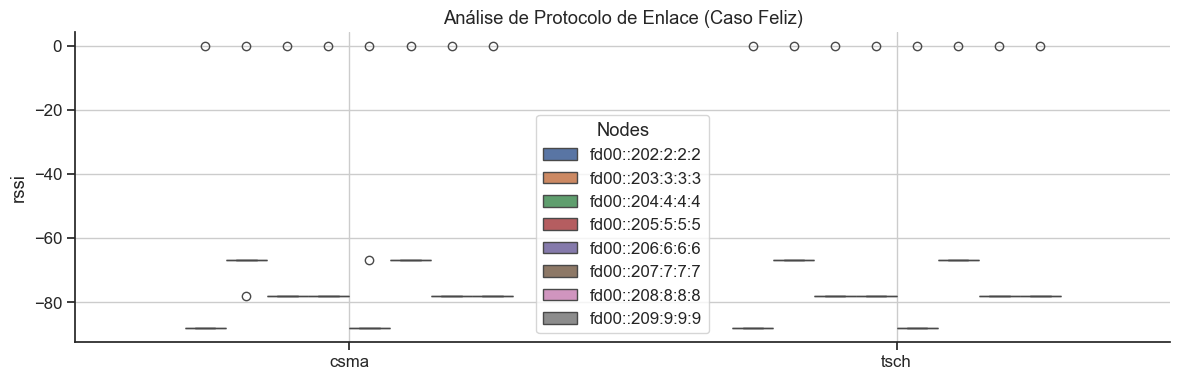

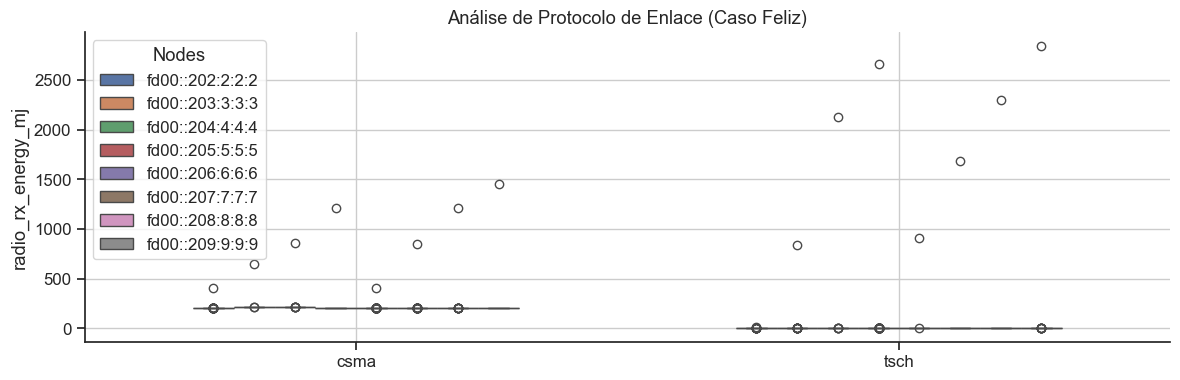

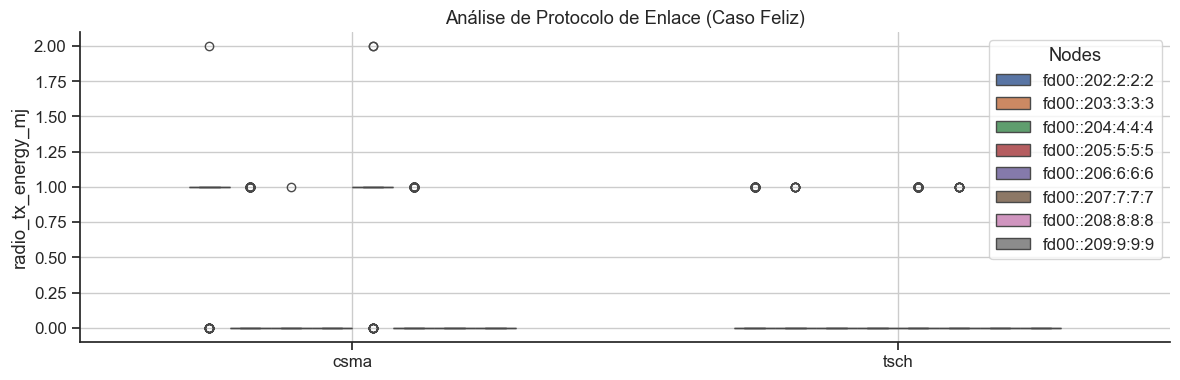

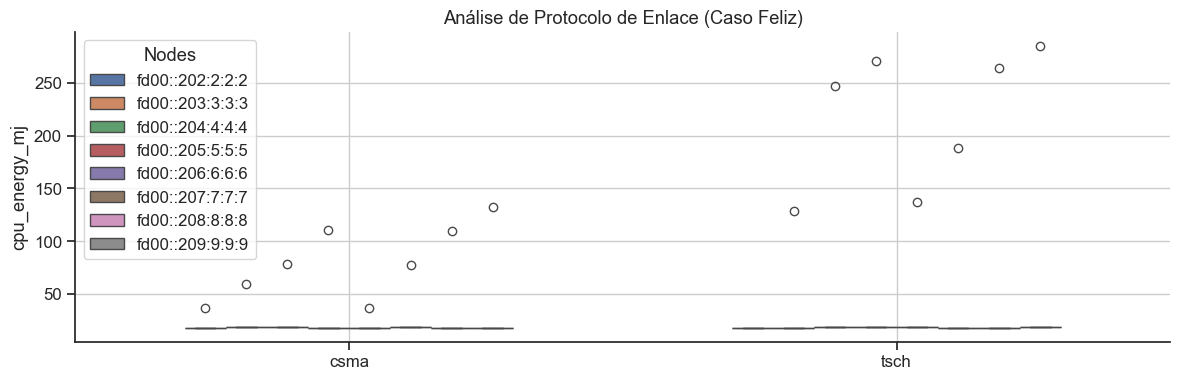

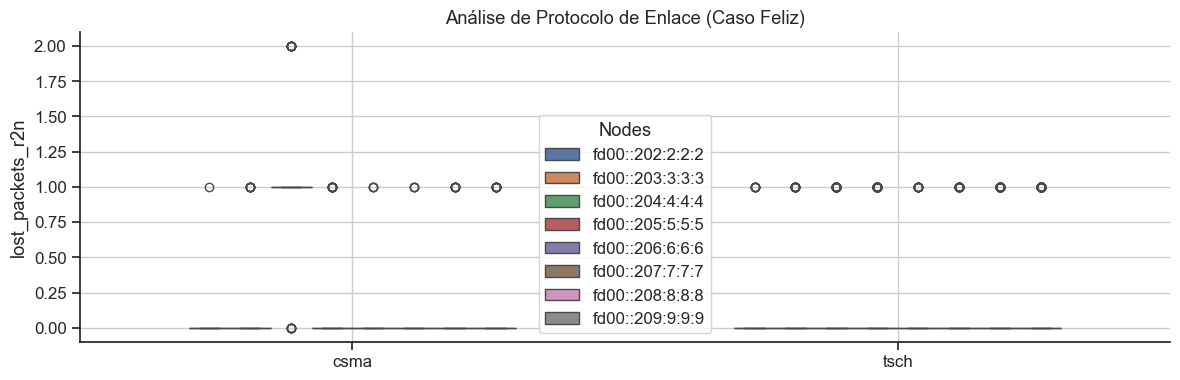

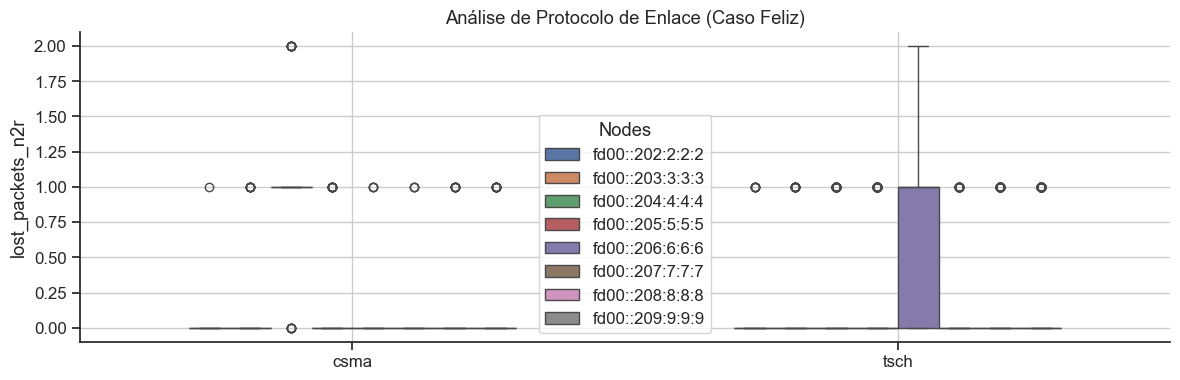

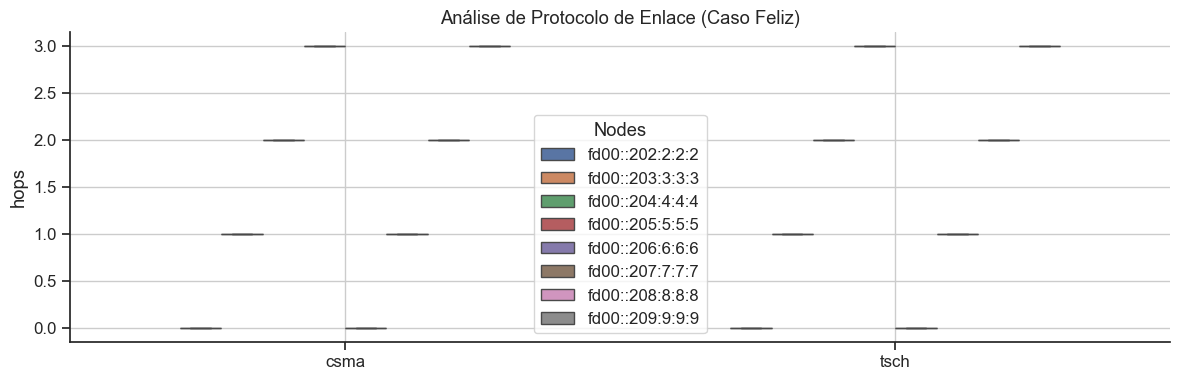

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks", font_scale=1.1)

fdf = data.query("type=='sta' and sim_id=='1' and mac in ['csma', 'tsch']").copy()

cols = [
    "rtt_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "lost_packets_r2n",
    "lost_packets_n2r",
    "hops",
]

fdf["lost_packets_r2n"] = fdf["server_sent"] - fdf["total_received"] 
fdf["lost_packets_n2r"] = fdf["server_sent"] + fdf["total_sent"] - fdf["server_received"]

for m in cols:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.boxplot(
        data=fdf,
        x="mac", y=m, hue="node",
        ax=ax, showcaps=True, width=.6
    )
    ax.set_title("Análise de Protocolo de Enlace (Caso Feliz)")
    ax.set_xlabel("")
    ax.set_ylabel(m)
    ax.legend(title="Nodes")
    ax.grid()
    sns.despine(ax=ax)
    fig.tight_layout()

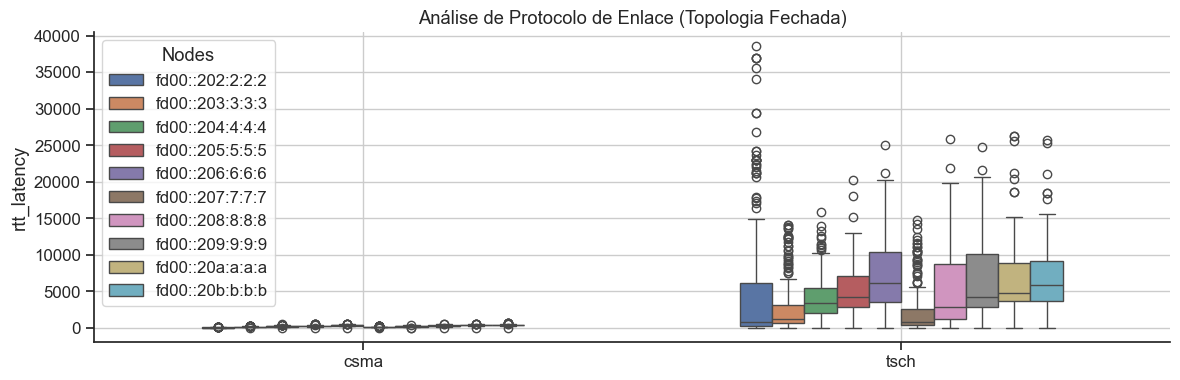

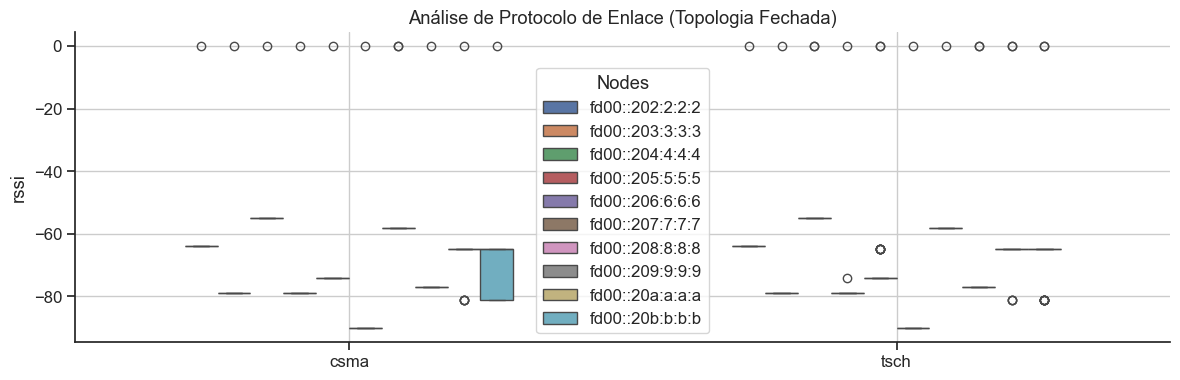

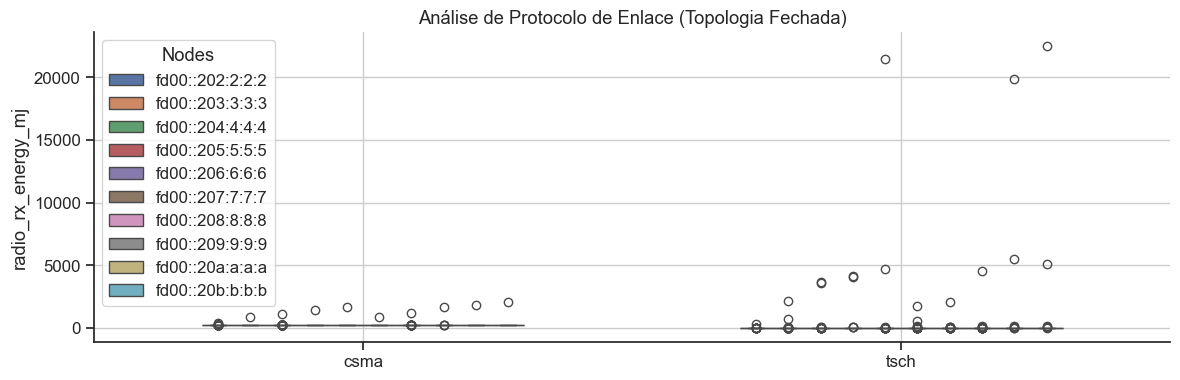

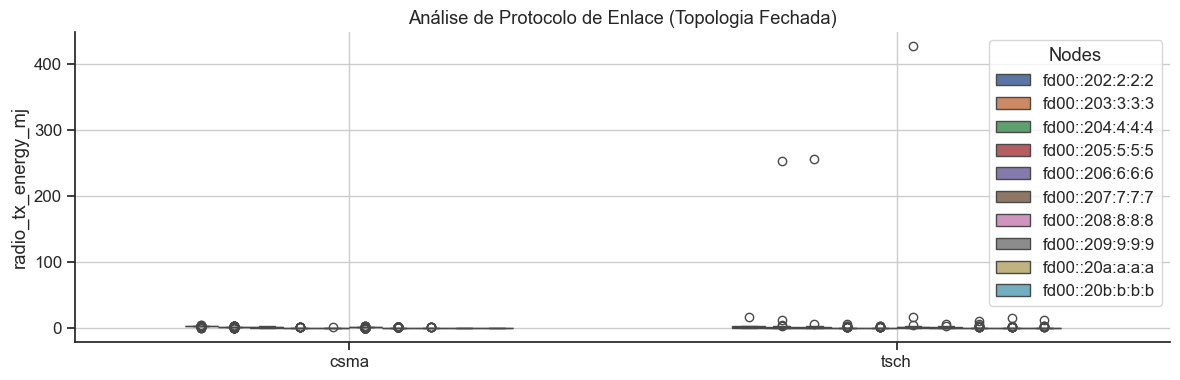

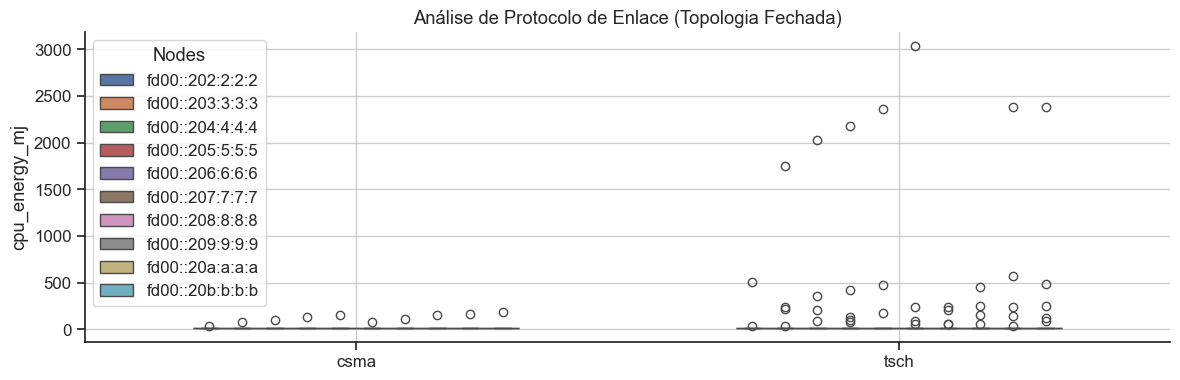

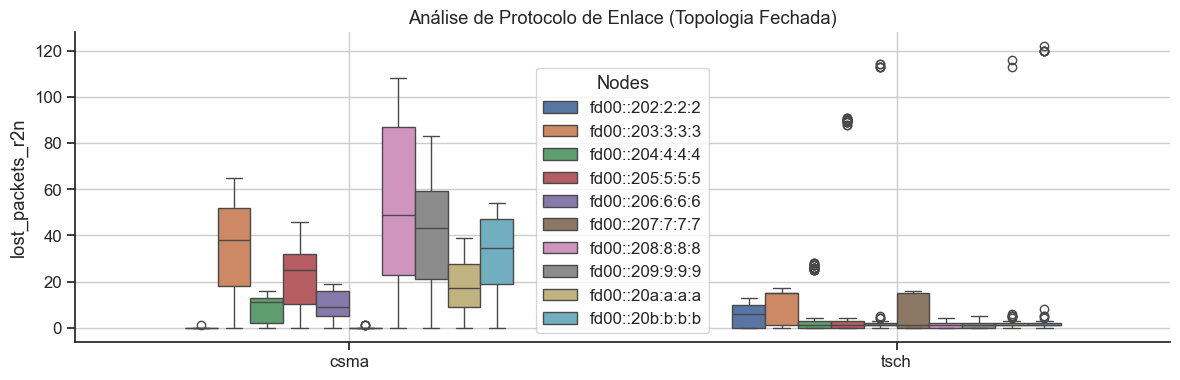

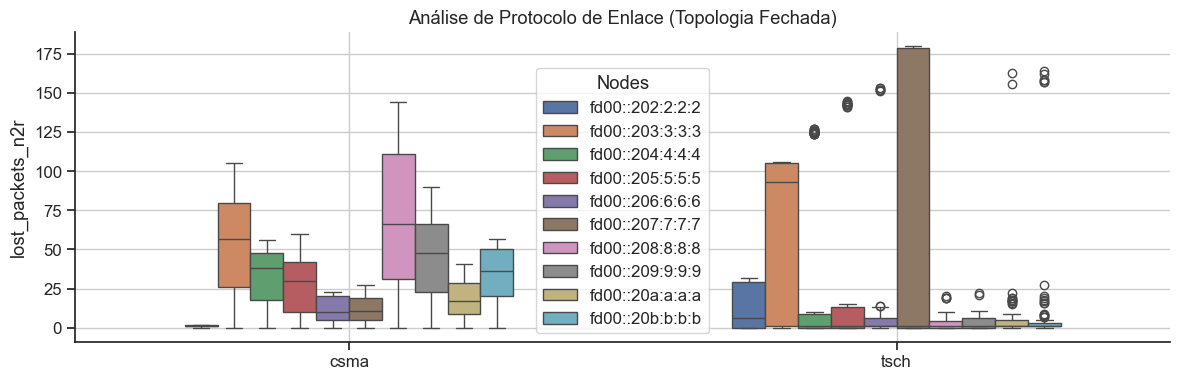

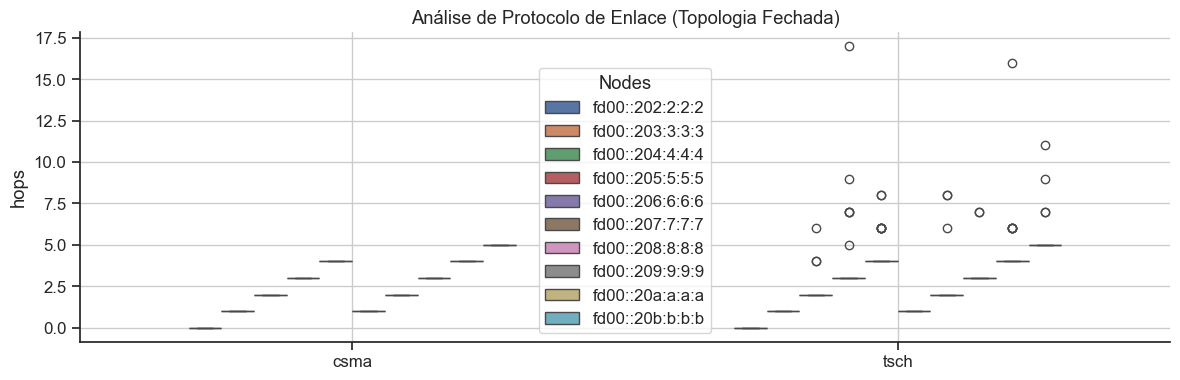

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks", font_scale=1.1)

fdf = data.query("type=='sta' and sim_id=='4' and mac in ['csma', 'tsch']").copy()

cols = [
    "rtt_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "lost_packets_r2n",
    "lost_packets_n2r",
    "hops",
]

fdf["lost_packets_r2n"] = fdf["server_sent"] - fdf["total_received"] 
fdf["lost_packets_n2r"] = fdf["server_sent"] + fdf["total_sent"] - fdf["server_received"]

for m in cols:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.boxplot(
        data=fdf,
        x="mac", y=m, hue="node",
        ax=ax, showcaps=True, width=.6
    )
    ax.set_title("Análise de Protocolo de Enlace (Topologia Fechada)")
    ax.set_xlabel("")
    ax.set_ylabel(m)
    ax.legend(title="Nodes")
    ax.grid()
    sns.despine(ax=ax)
    fig.tight_layout()

## Simulações com Mobilidade

### Protocolos de Enlace

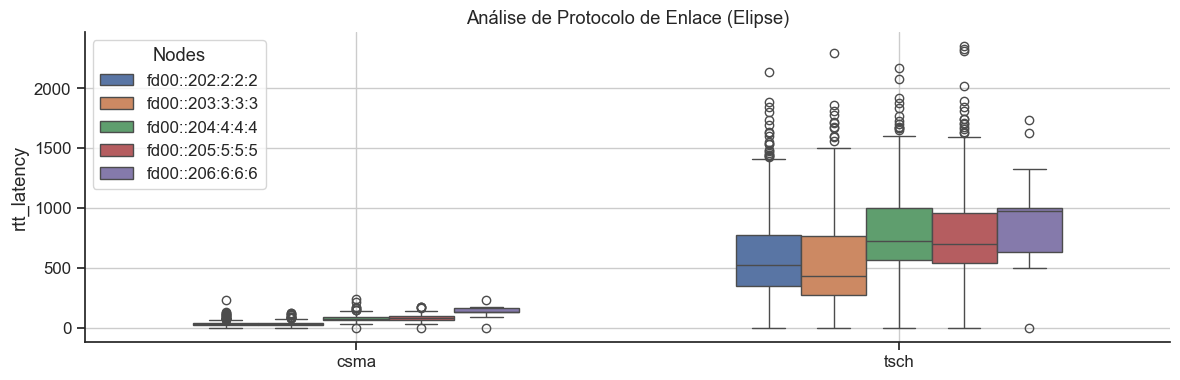

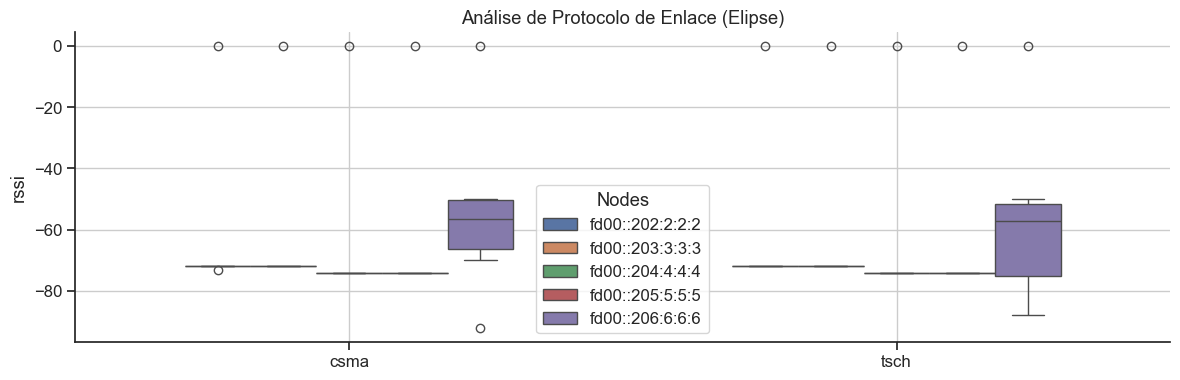

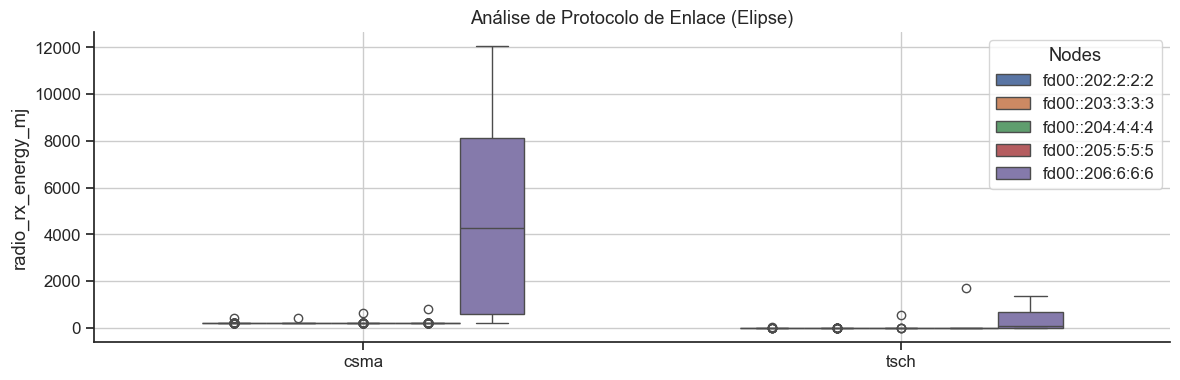

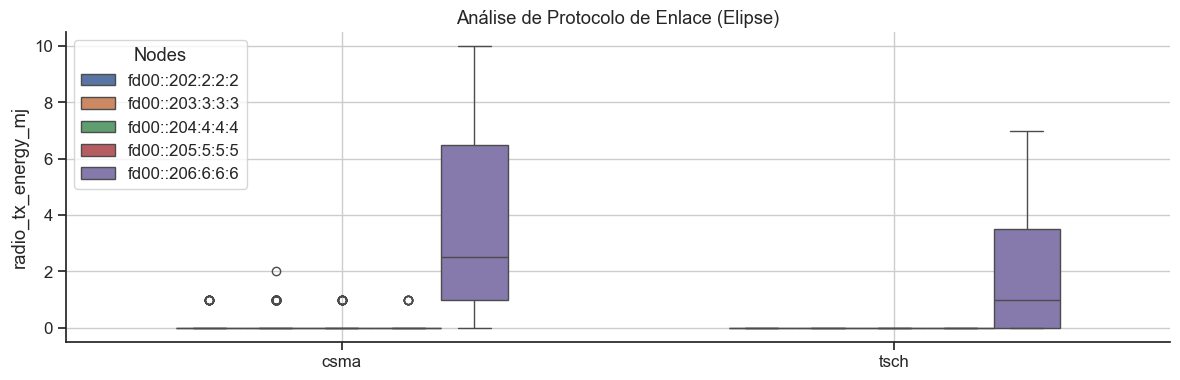

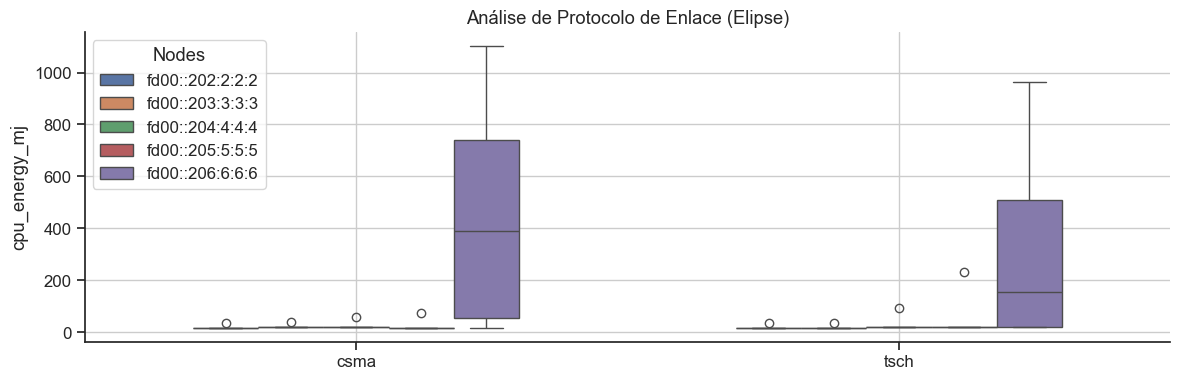

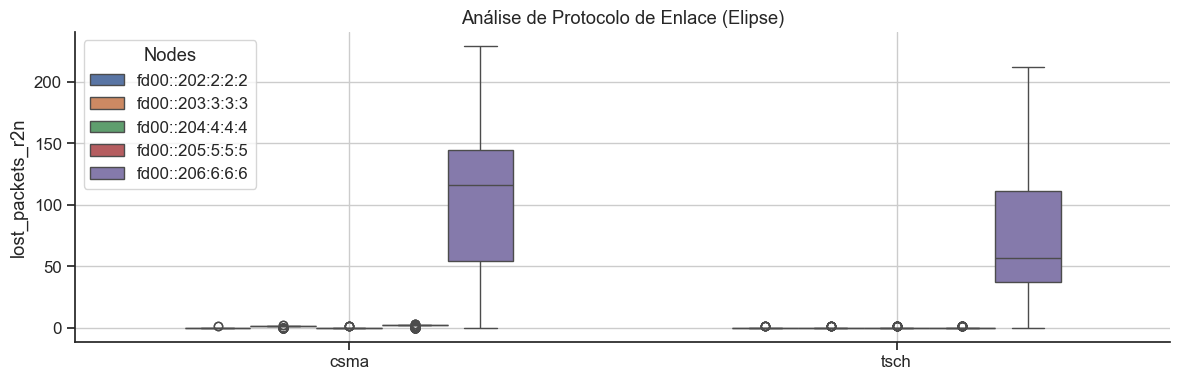

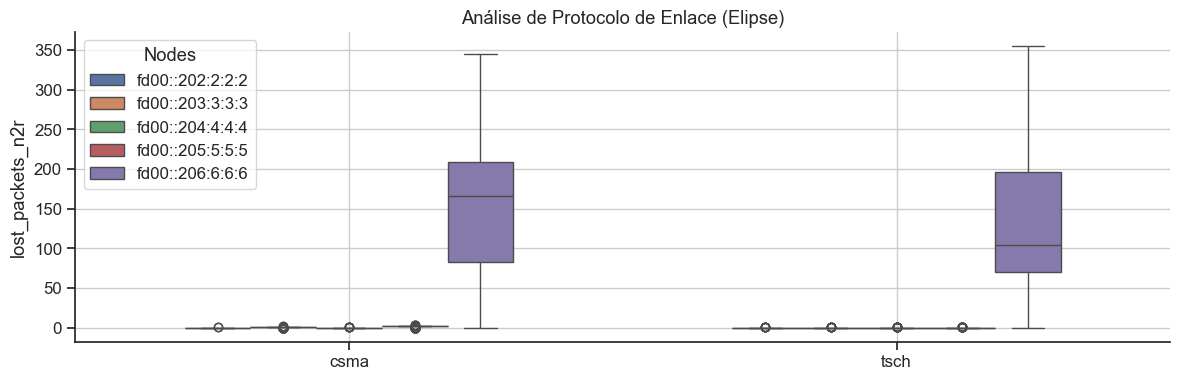

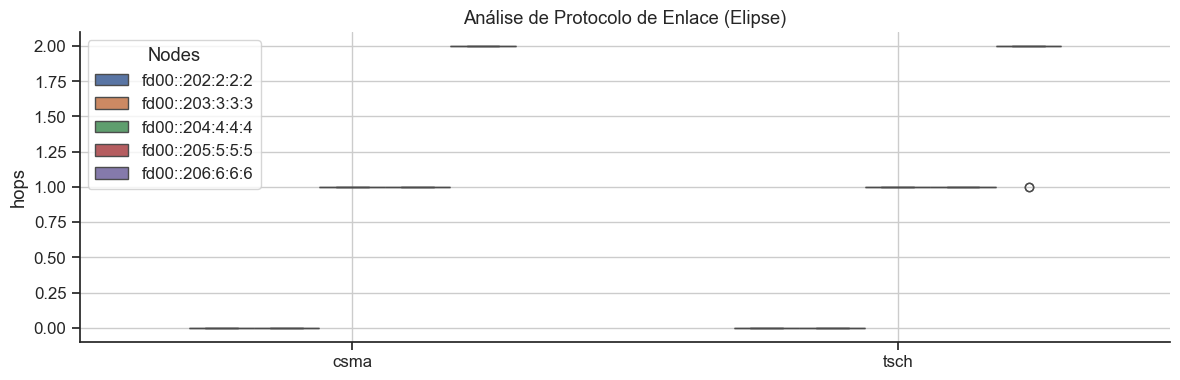

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks", font_scale=1.1)

fdf = data.query("type=='mob' and sim_id=='1' and mac in ['csma', 'tsch']").copy()

cols = [
    "rtt_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "lost_packets_r2n",
    "lost_packets_n2r",
    "hops",
]

fdf["lost_packets_r2n"] = fdf["server_sent"] - fdf["total_received"] 
fdf["lost_packets_n2r"] = fdf["server_sent"] + fdf["total_sent"] - fdf["server_received"]

for m in cols:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.boxplot(
        data=fdf,
        x="mac", y=m, hue="node",
        ax=ax, showcaps=True, width=.6
    )
    ax.set_title("Análise de Protocolo de Enlace (Elipse)")
    ax.set_xlabel("")
    ax.set_ylabel(m)
    ax.legend(title="Nodes")
    ax.grid()
    sns.despine(ax=ax)
    fig.tight_layout()

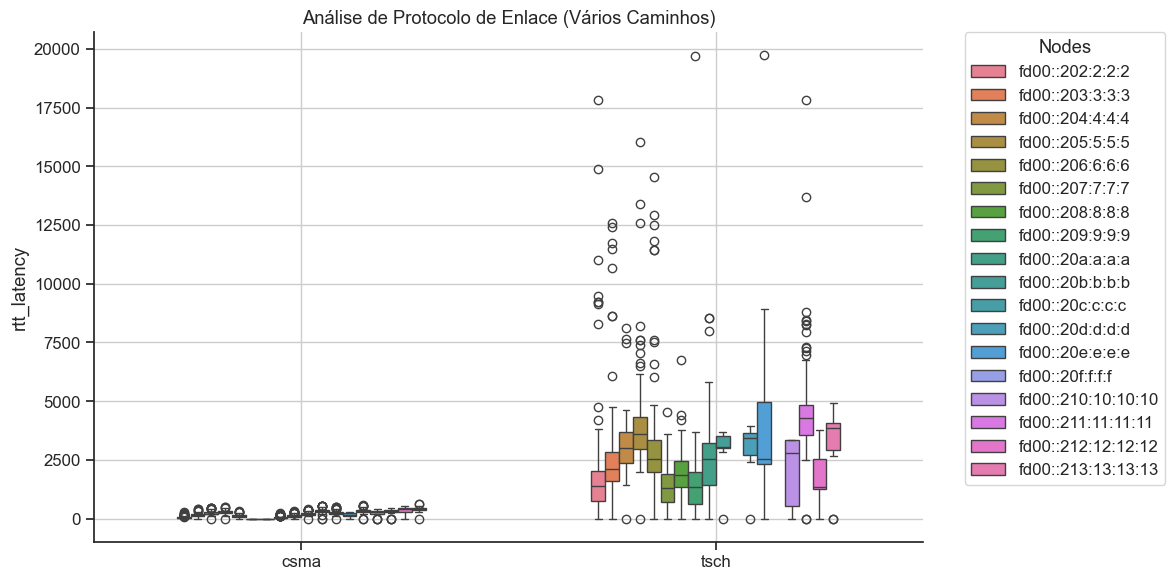

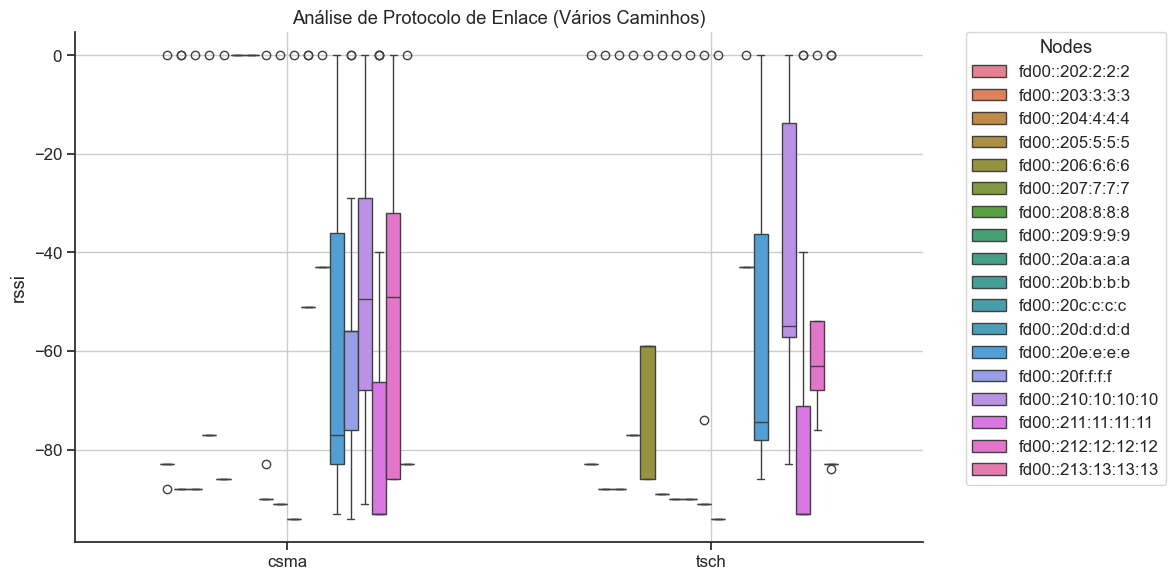

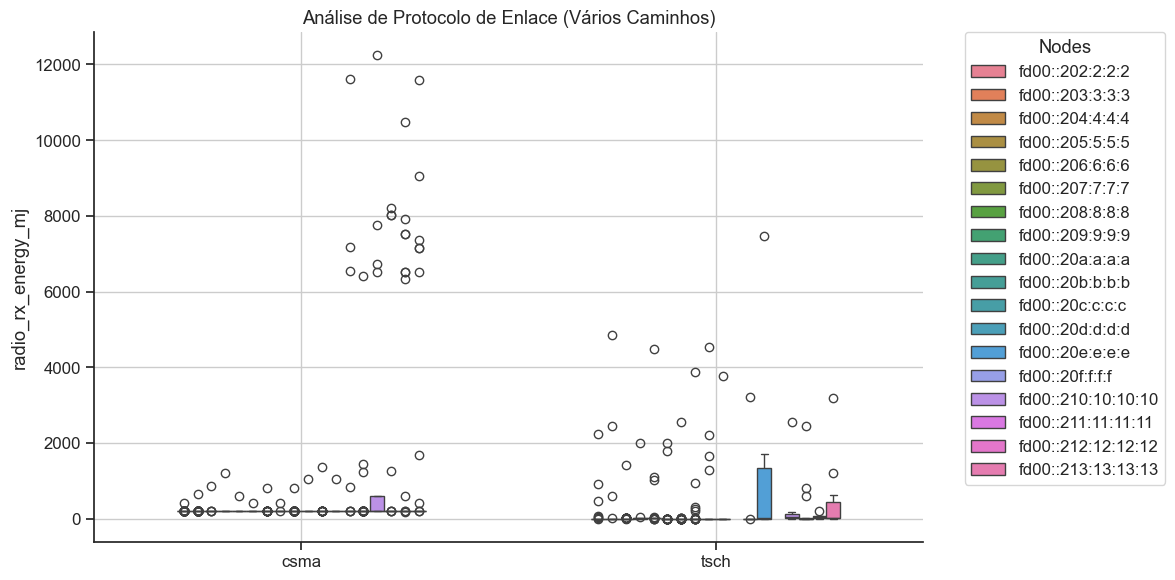

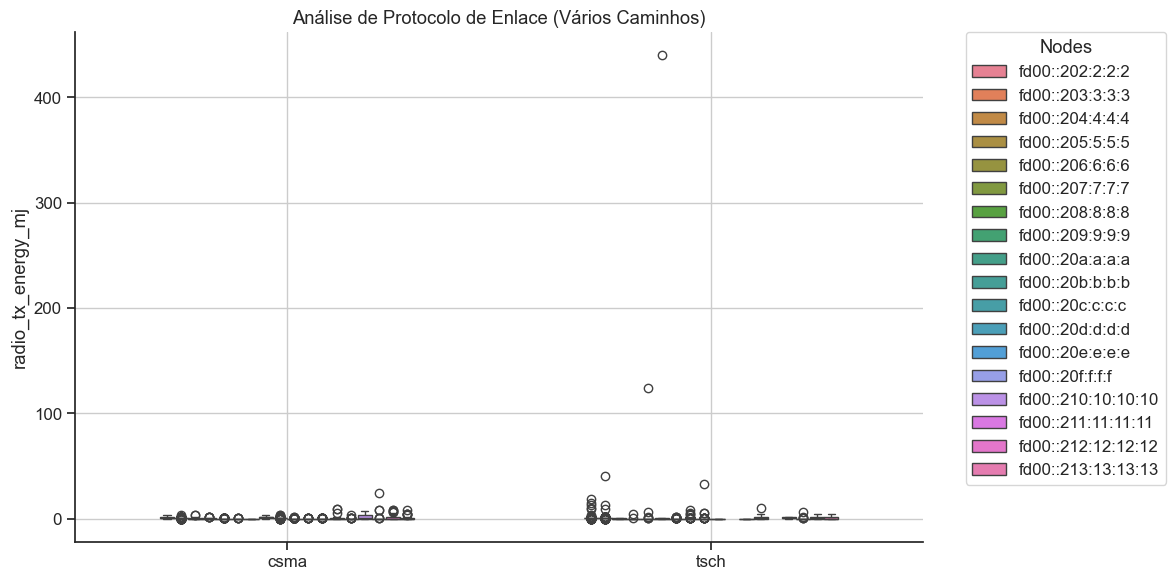

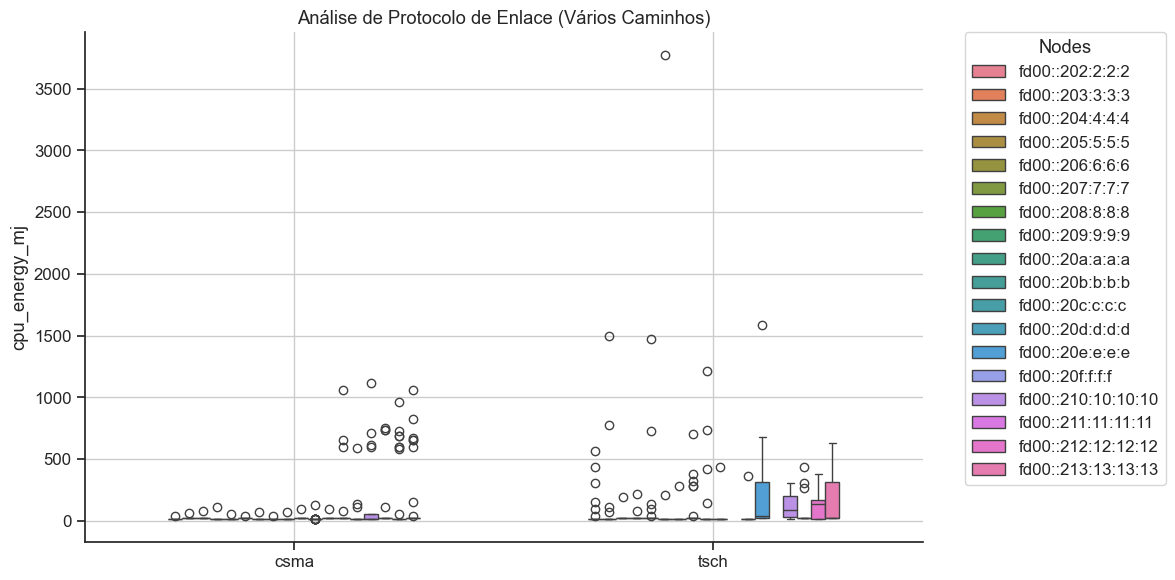

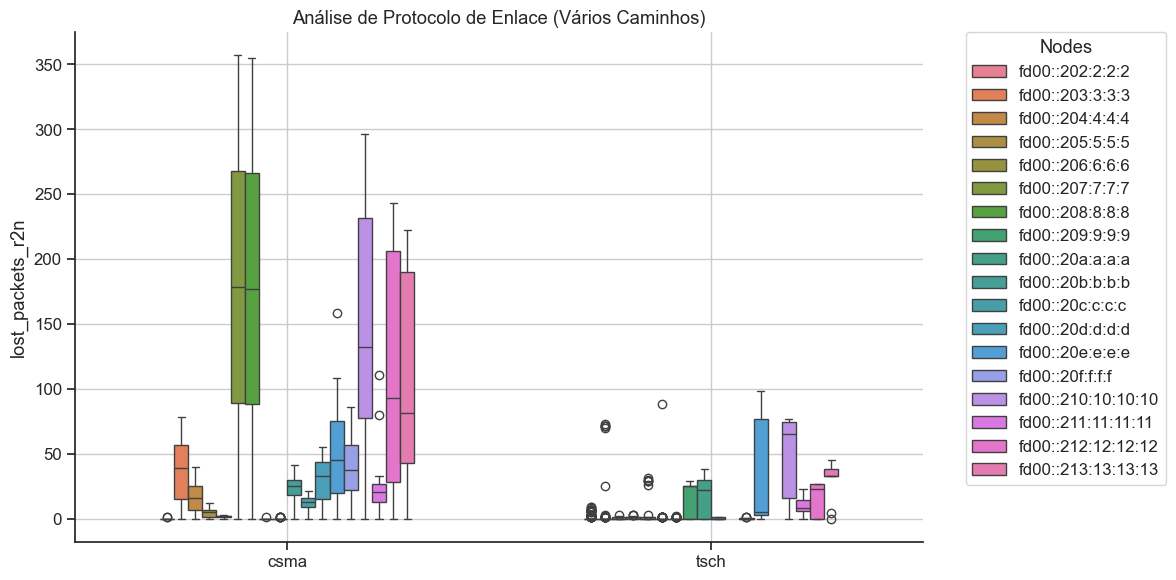

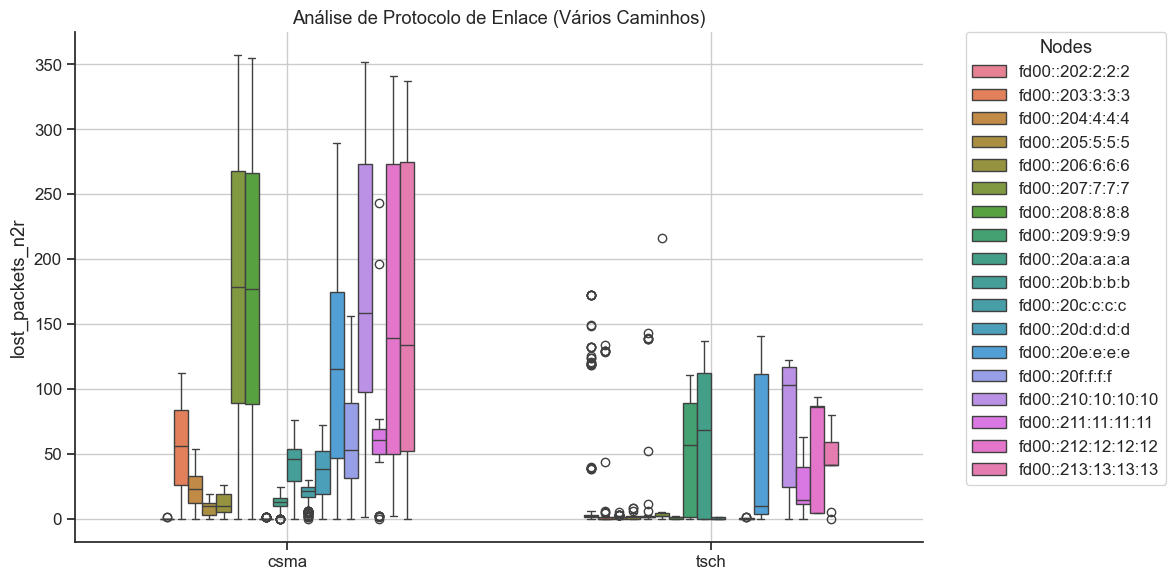

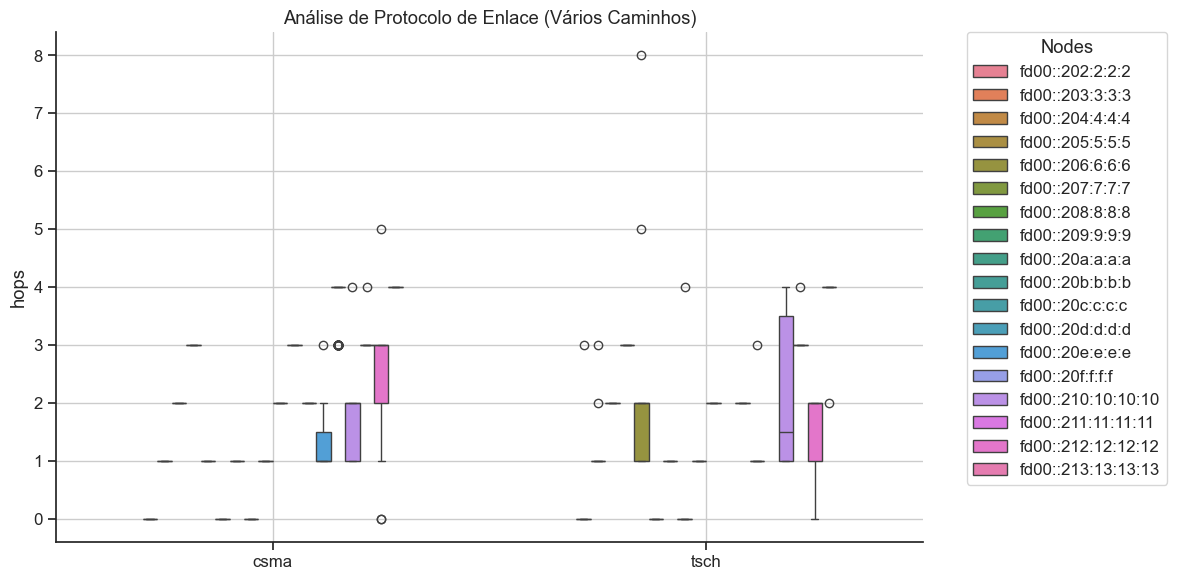

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks", font_scale=1.1)

fdf = data.query("type=='mob' and sim_id=='2' and mac in ['csma', 'tsch']").copy()

cols = [
    "rtt_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "lost_packets_r2n",
    "lost_packets_n2r",
    "hops",
]

fdf["lost_packets_r2n"] = fdf["server_sent"] - fdf["total_received"] 
fdf["lost_packets_n2r"] = fdf["server_sent"] + fdf["total_sent"] - fdf["server_received"]

for m in cols:
    fig, ax = plt.subplots(figsize=(12,6))
    sns.boxplot(
        data=fdf,
        x="mac", y=m, hue="node",
        ax=ax, showcaps=True, width=.6
    )
    ax.set_title("Análise de Protocolo de Enlace (Vários Caminhos)")
    ax.set_xlabel("")
    ax.set_ylabel(m)
    ax.legend(
        title="Nodes",
        bbox_to_anchor=(1.05, 1),  # posição fora da área de plot
        loc='upper left',          # canto superior esquerdo da caixa da legenda
        borderaxespad=0.
    )
    ax.grid()
    sns.despine(ax=ax)
    fig.tight_layout()

### Topologia e Cobertura

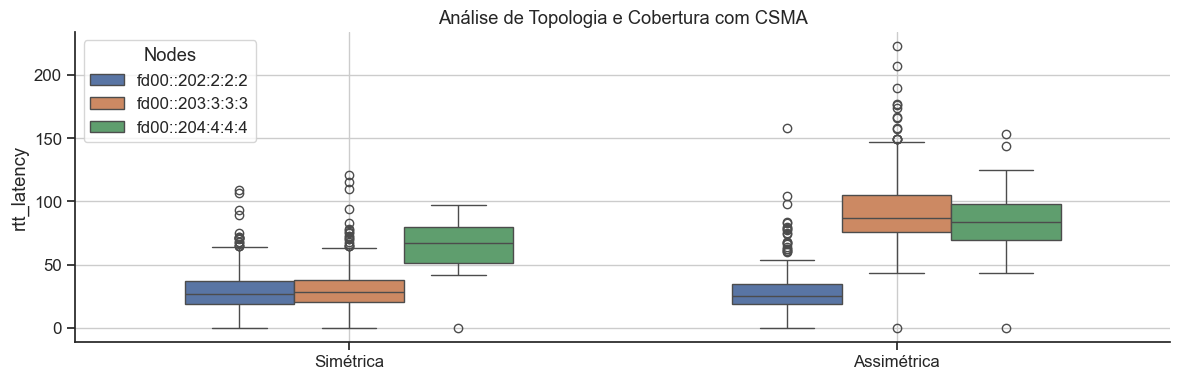

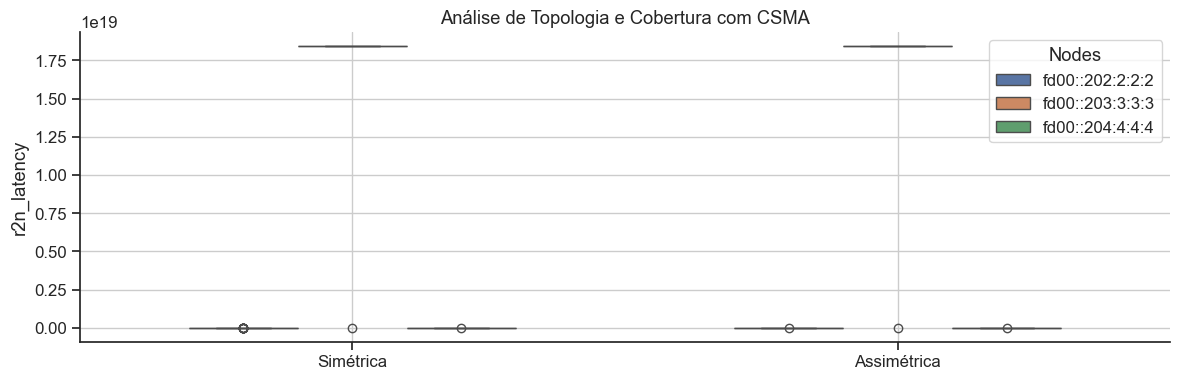

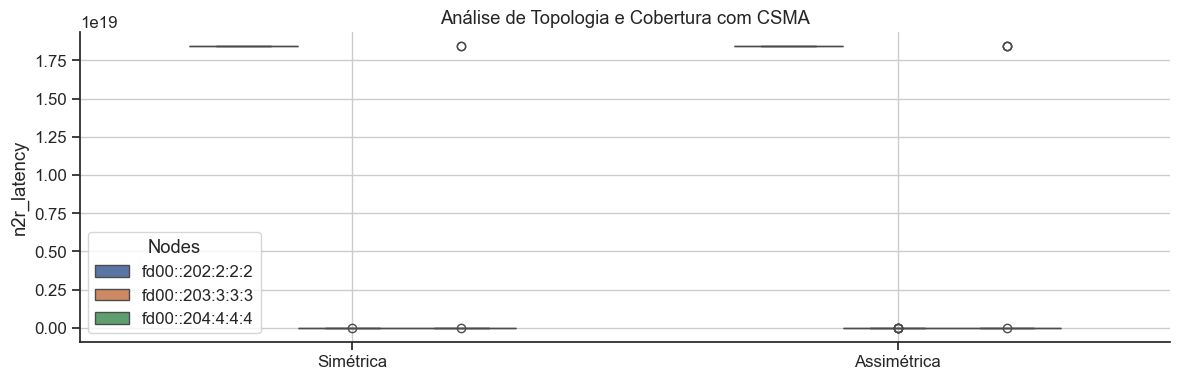

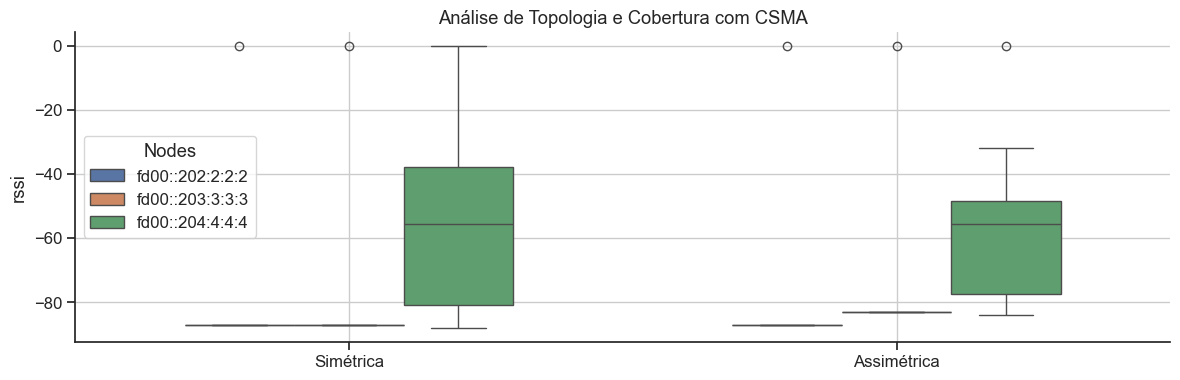

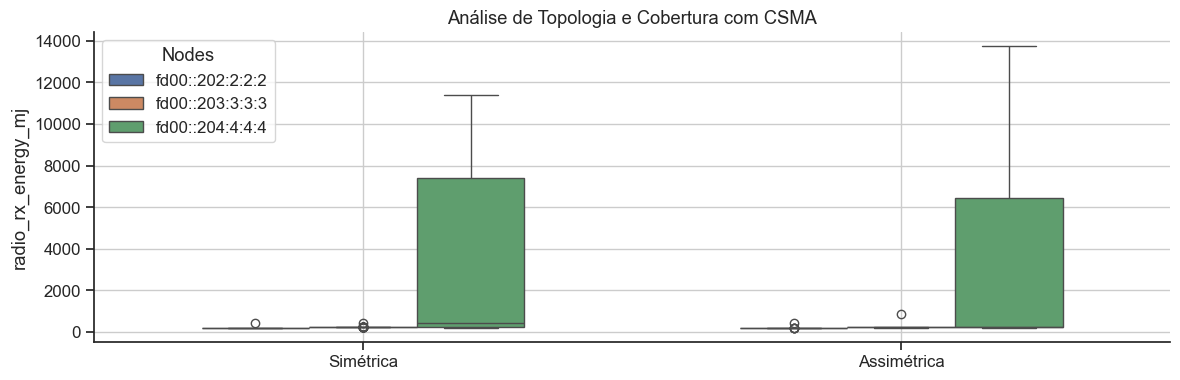

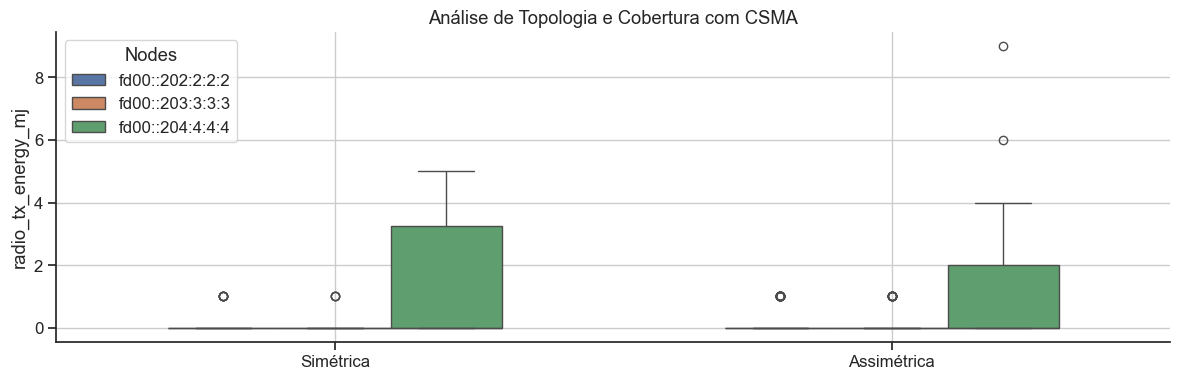

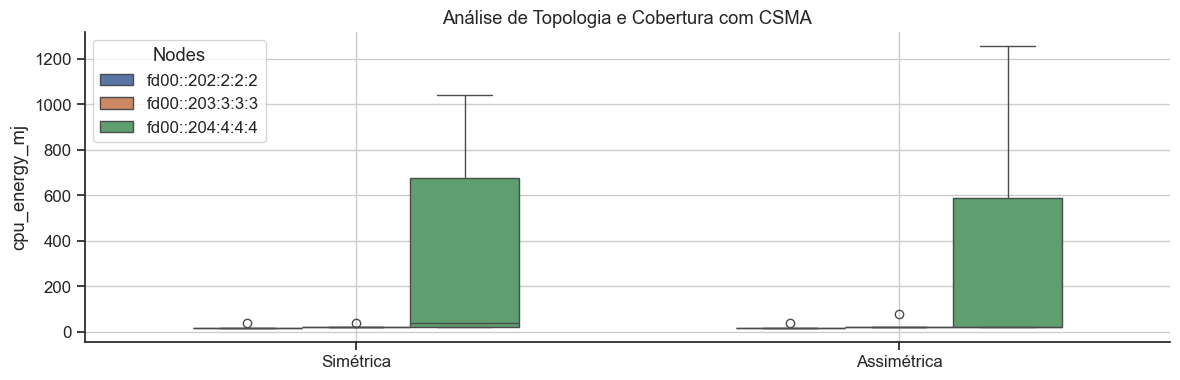

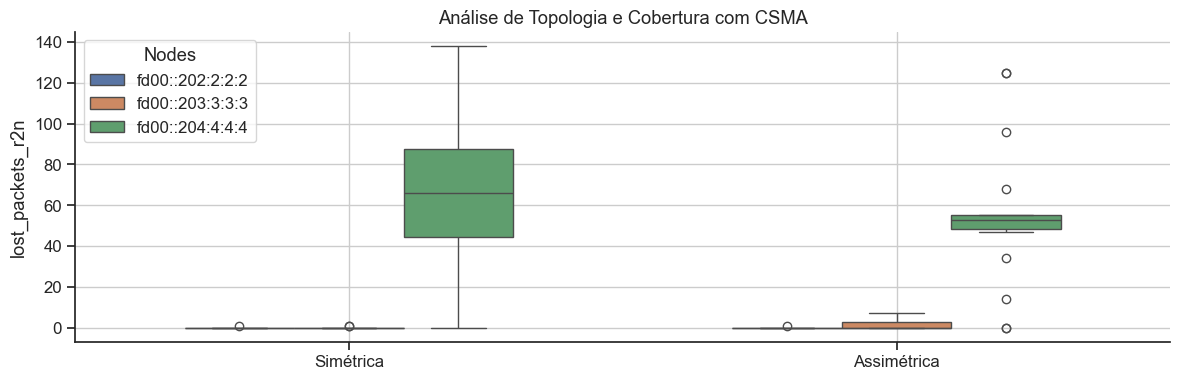

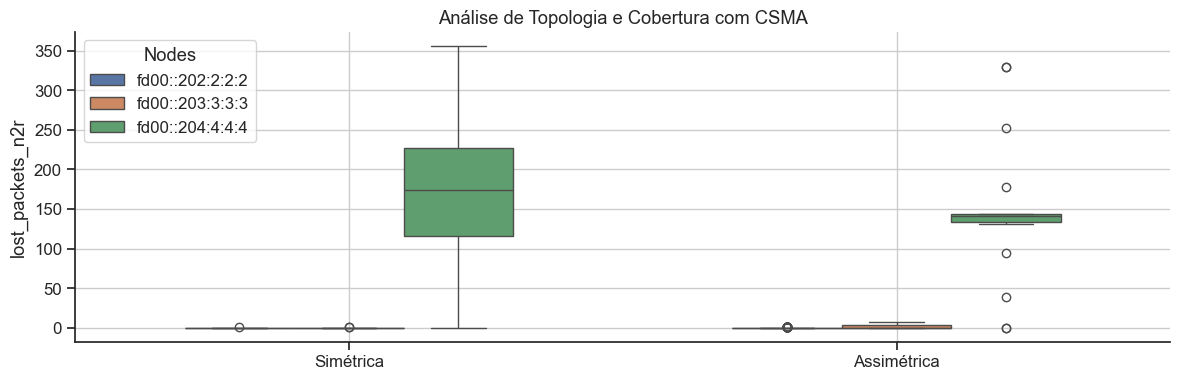

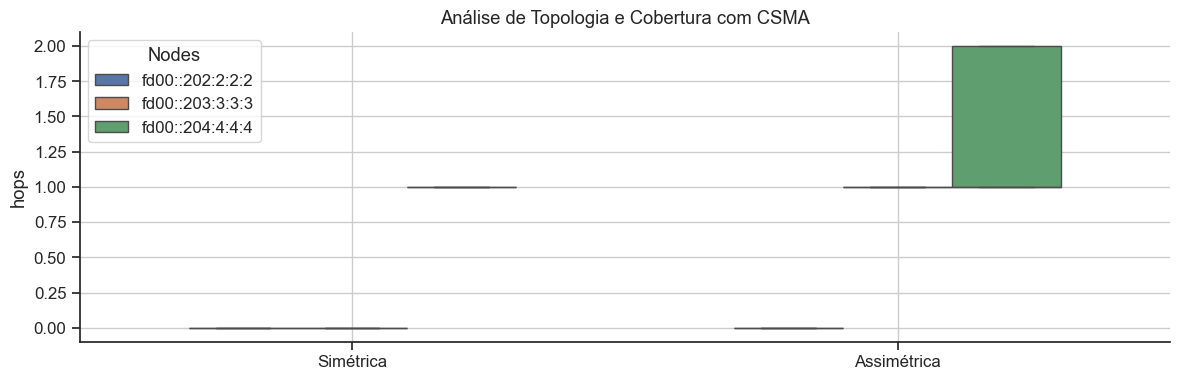

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks", font_scale=1.1)

fdf = data.query("type=='mob' and mac=='csma' and sim_id in ['3','4']").copy()

fdf['label'] = np.where(fdf['sim_id'] == '3', 'Simétrica', 'Assimétrica')

cols = [
    "rtt_latency",
    "r2n_latency",
    "n2r_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "lost_packets_r2n",
    "lost_packets_n2r",
    "hops",
]

fdf["lost_packets_r2n"] = fdf["server_sent"] - fdf["total_received"] 
fdf["lost_packets_n2r"] = fdf["server_sent"] + fdf["total_sent"] - fdf["server_received"]

for m in cols:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.boxplot(
        data=fdf,
        x="label", y=m, hue="node",
        ax=ax, showcaps=True, width=.6
    )
    ax.set_title("Análise de Topologia e Cobertura com CSMA")
    ax.set_xlabel("")
    ax.set_ylabel(m)
    ax.legend(title="Nodes")
    ax.grid()
    sns.despine(ax=ax)
    fig.tight_layout()

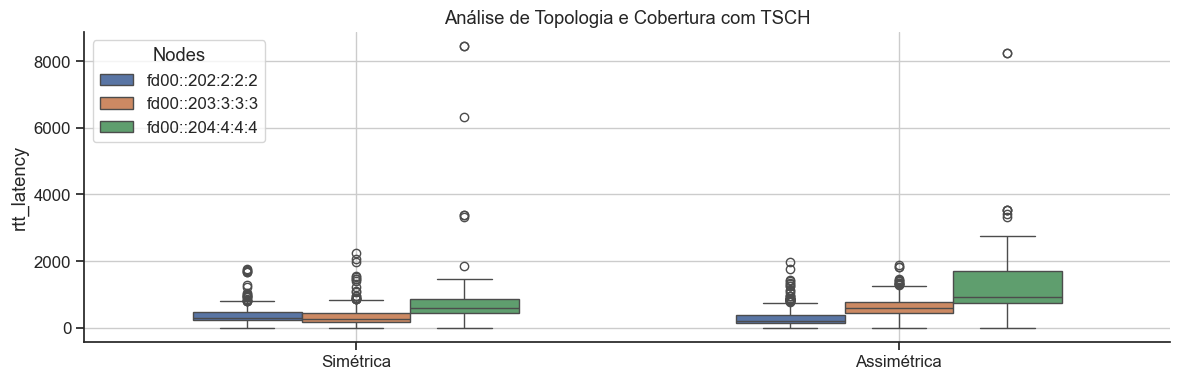

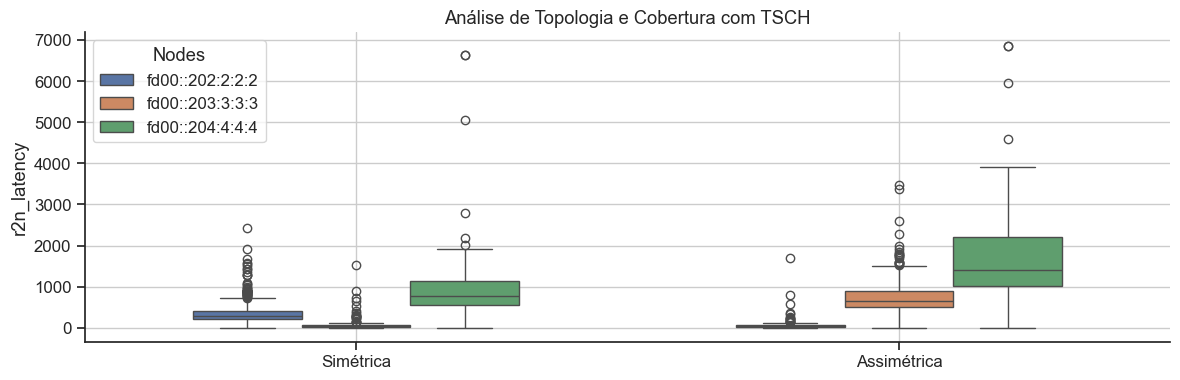

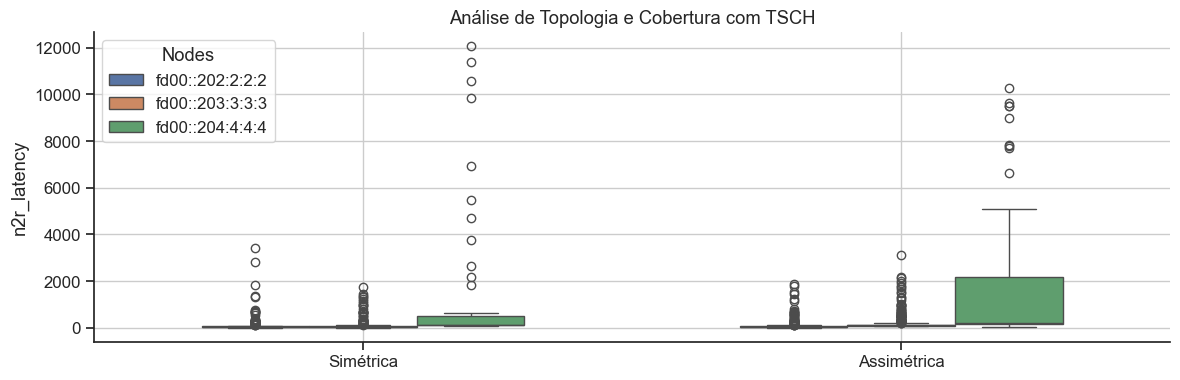

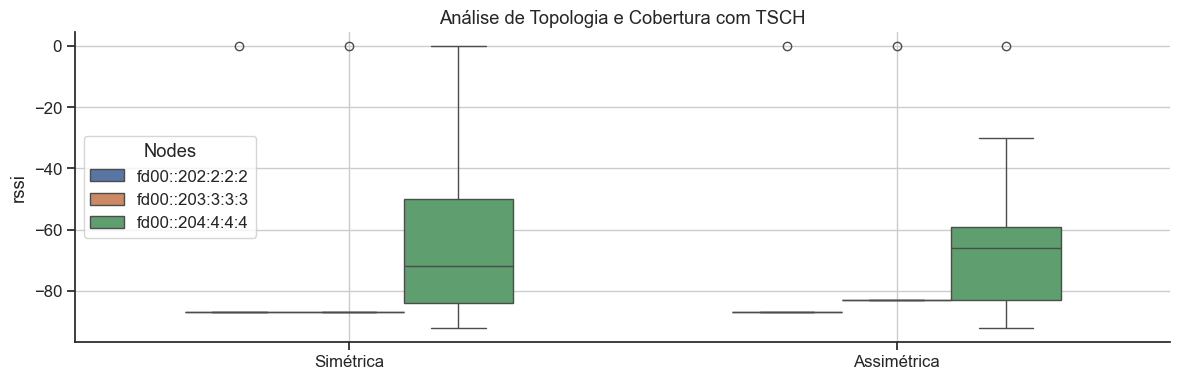

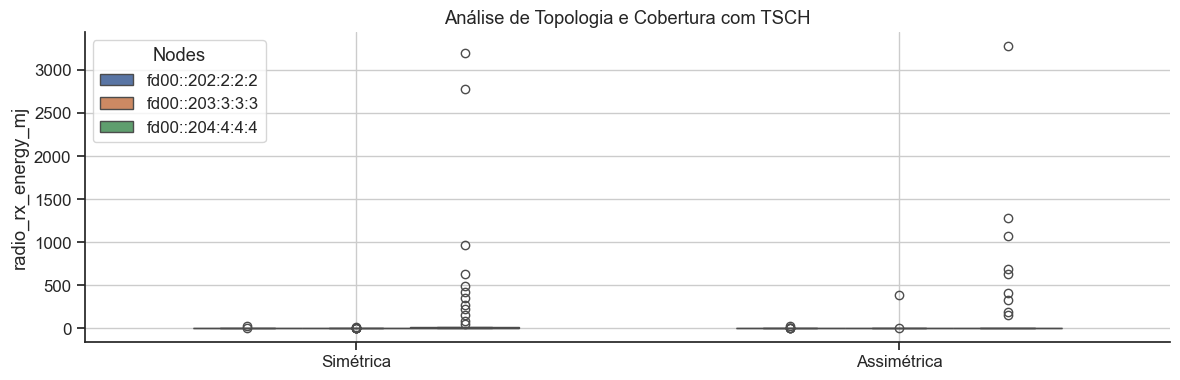

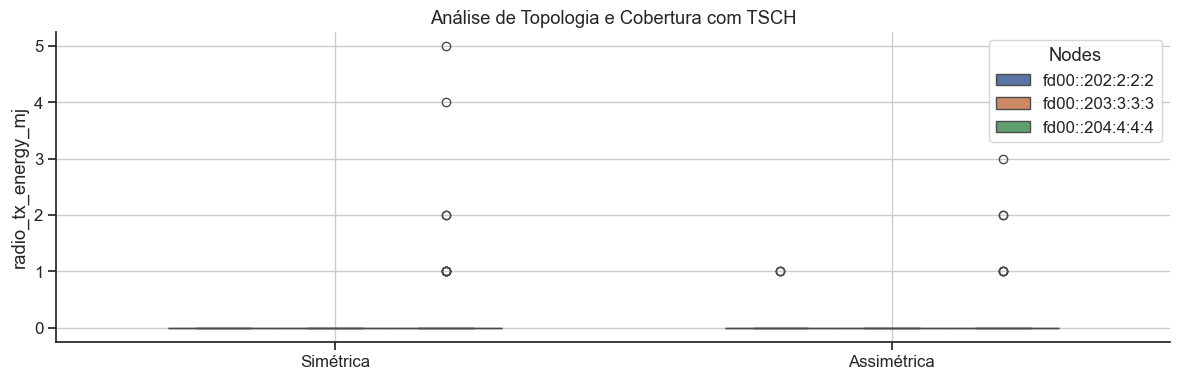

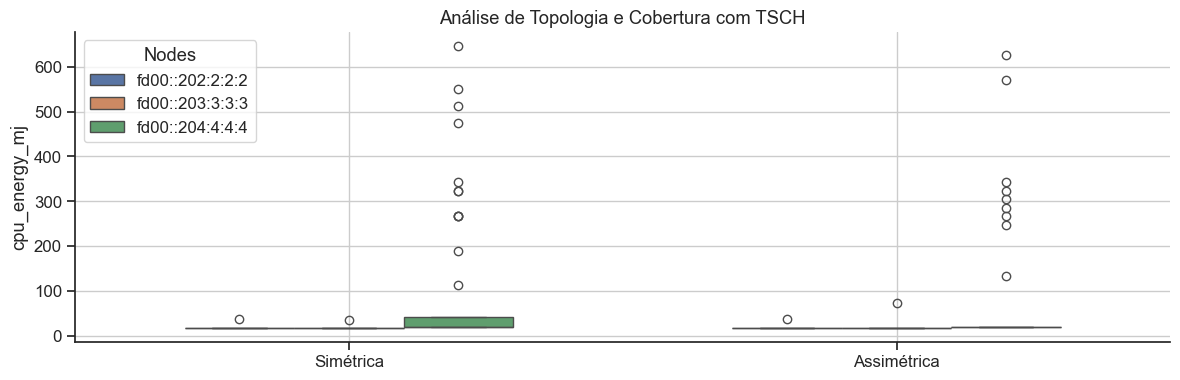

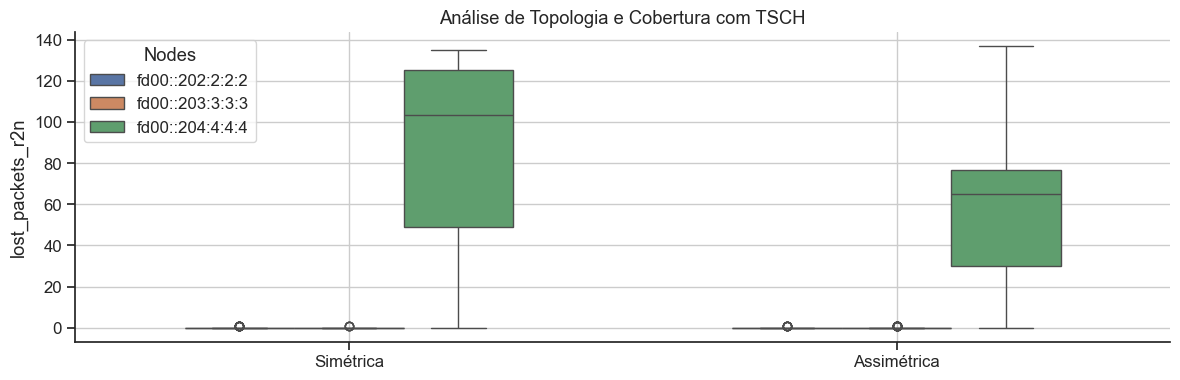

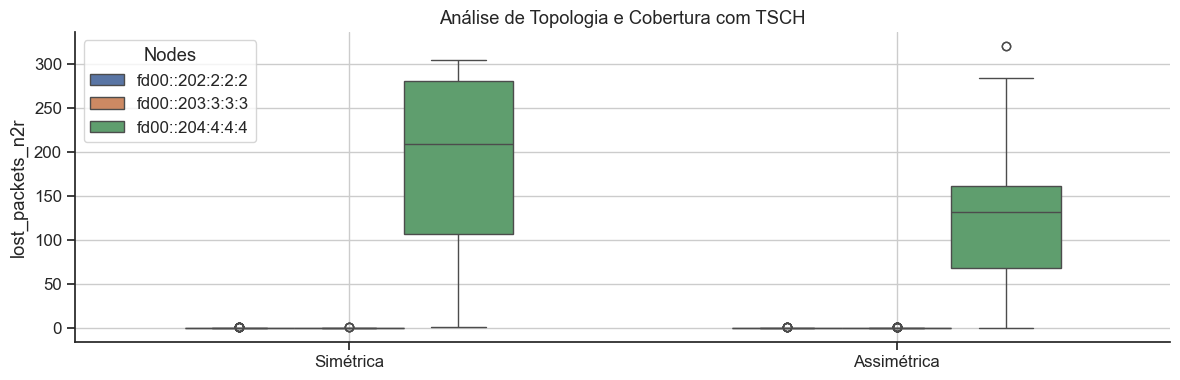

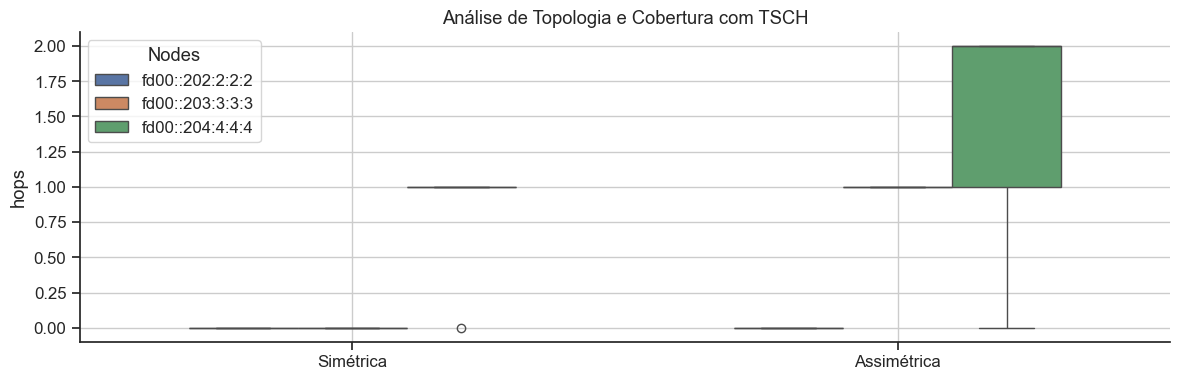

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks", font_scale=1.1)

fdf = data.query("type=='mob' and mac=='tsch' and sim_id in ['3','4']").copy()

fdf['label'] = np.where(fdf['sim_id'] == '3', 'Simétrica', 'Assimétrica')

cols = [
    "rtt_latency",
    "r2n_latency",
    "n2r_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "lost_packets_r2n",
    "lost_packets_n2r",
    "hops",
]

fdf["lost_packets_r2n"] = fdf["server_sent"] - fdf["total_received"] 
fdf["lost_packets_n2r"] = fdf["server_sent"] + fdf["total_sent"] - fdf["server_received"]

for m in cols:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.boxplot(
        data=fdf,
        x="label", y=m, hue="node",
        ax=ax, showcaps=True, width=.6
    )
    ax.set_title("Análise de Topologia e Cobertura com TSCH")
    ax.set_xlabel("")
    ax.set_ylabel(m)
    ax.legend(title="Nodes")
    ax.grid()
    sns.despine(ax=ax)
    fig.tight_layout()

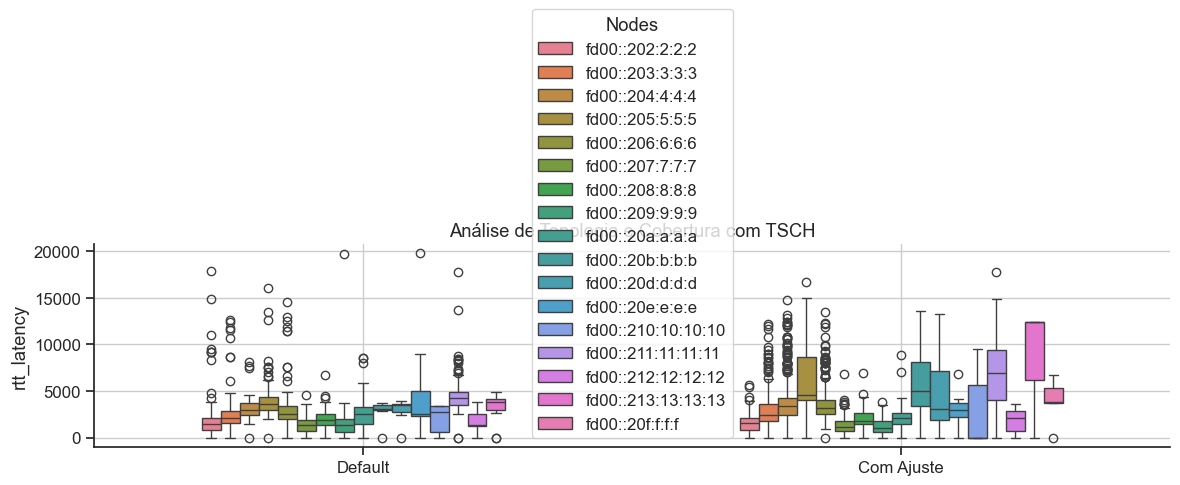

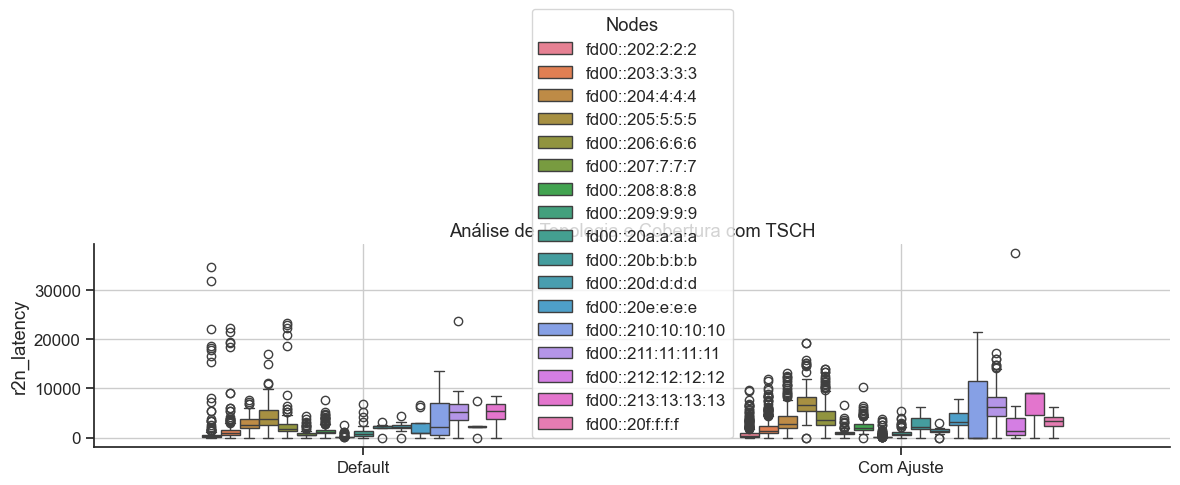

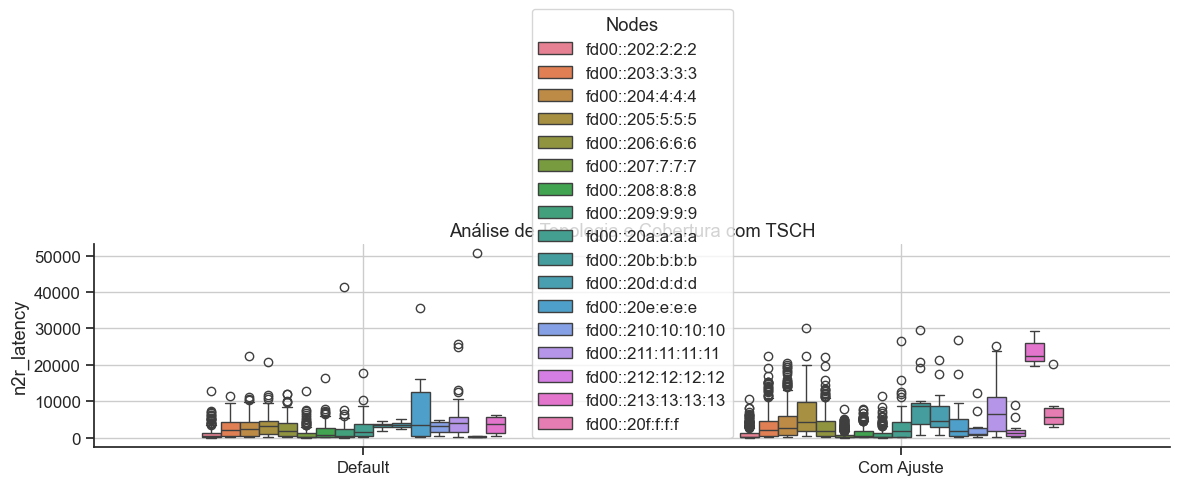

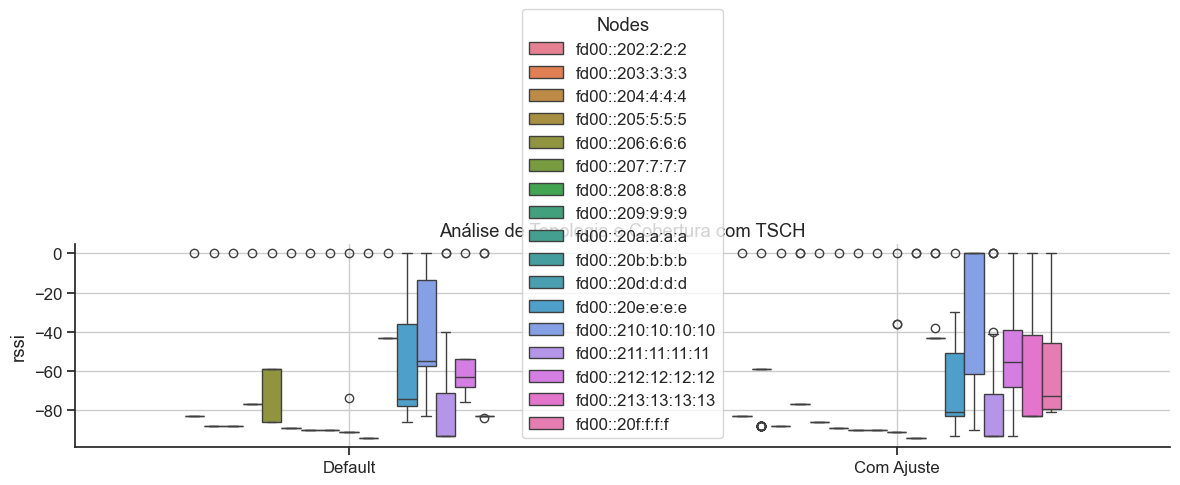

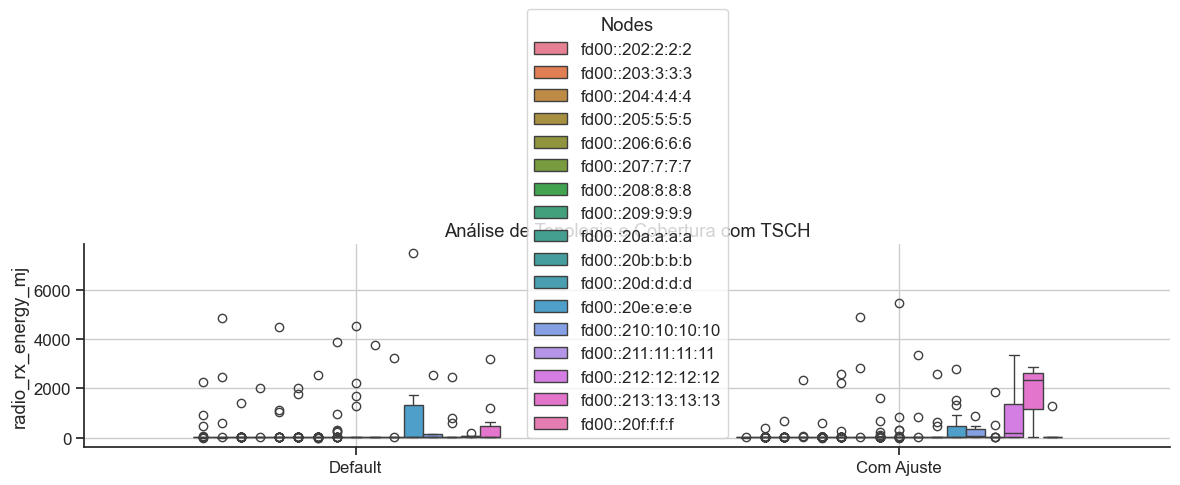

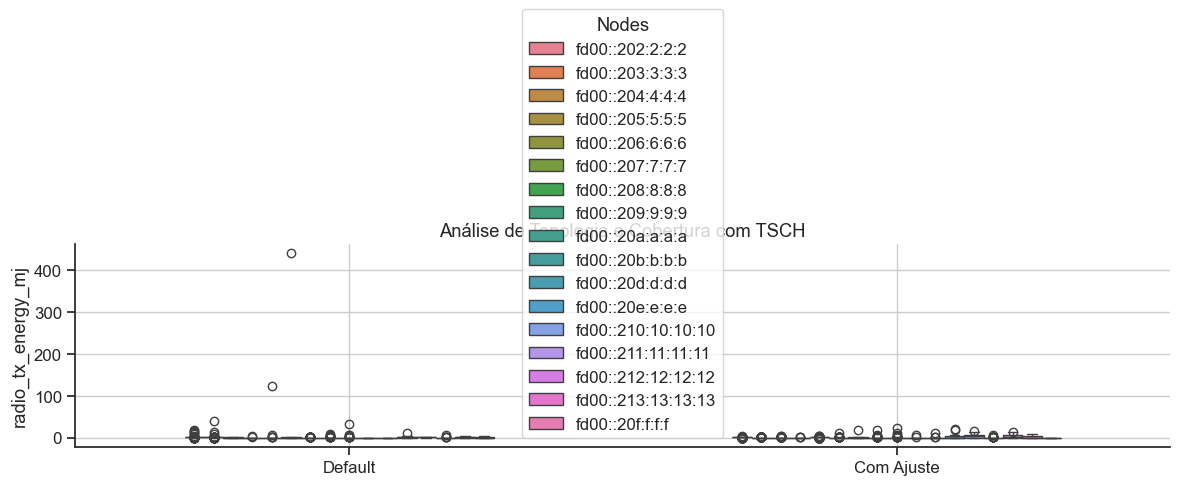

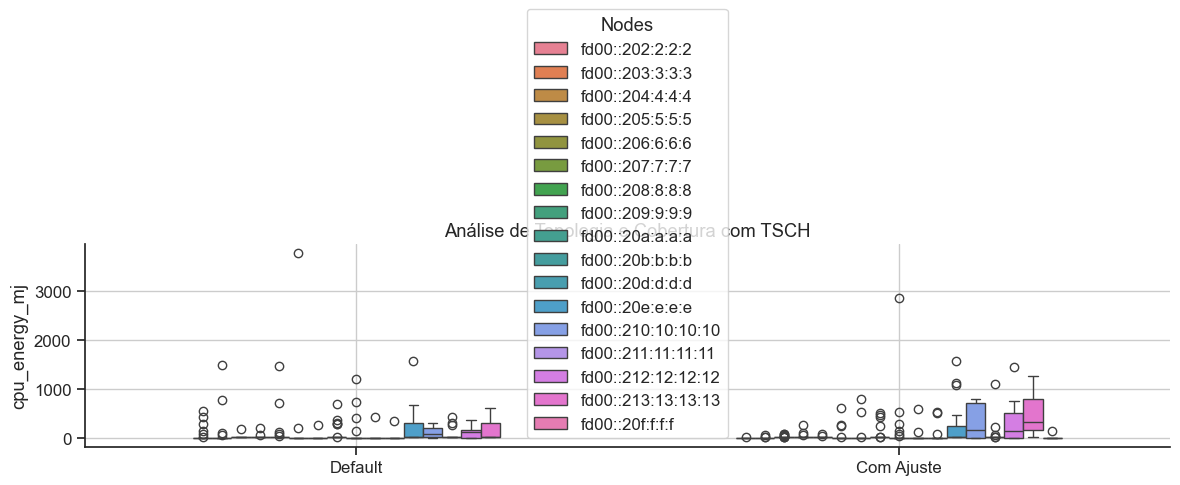

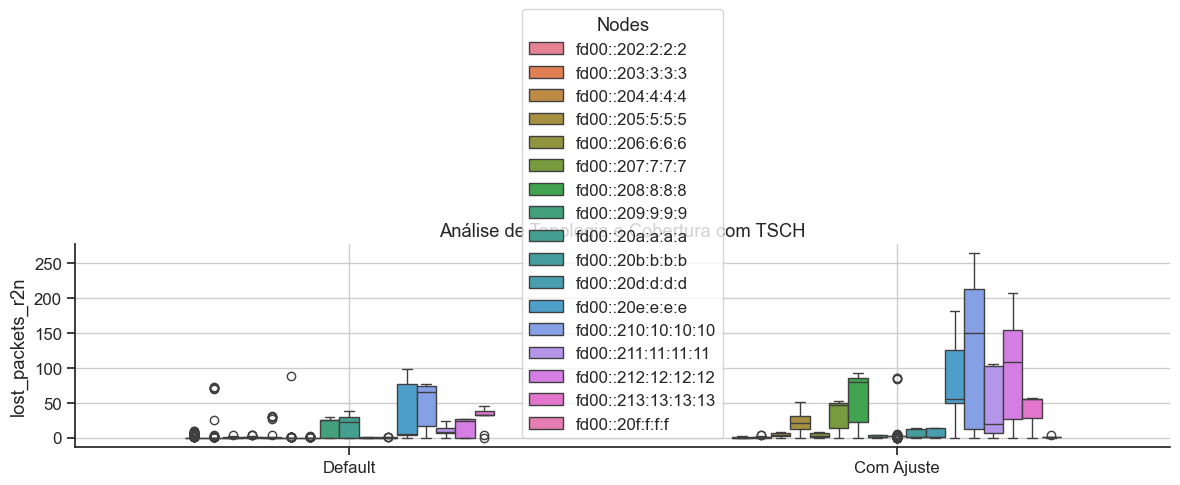

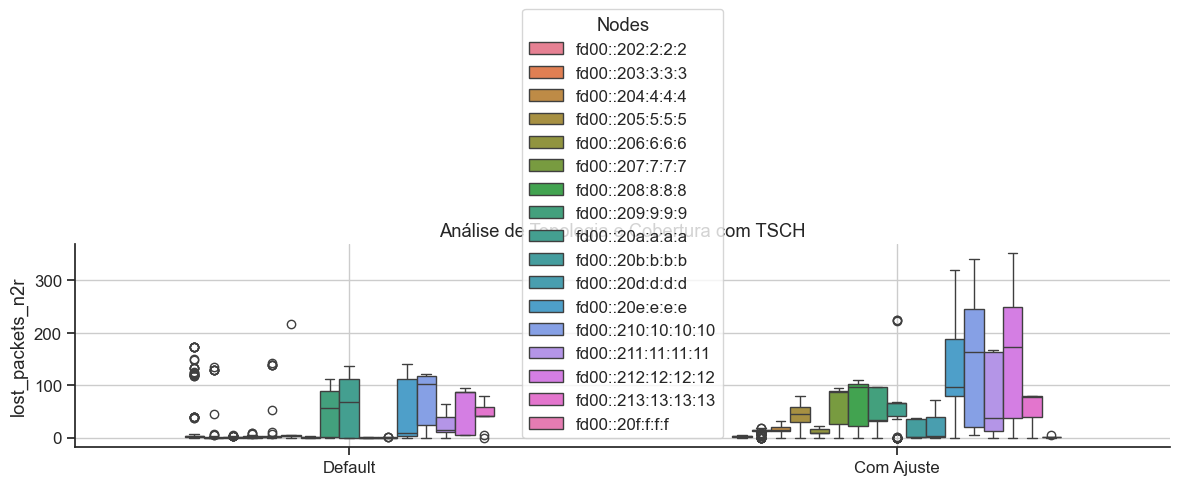

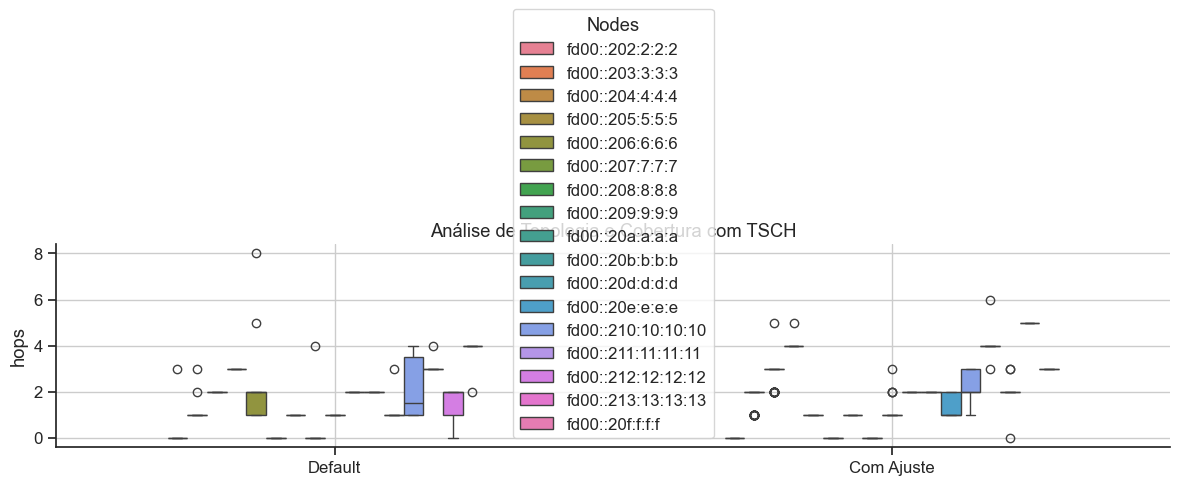

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks", font_scale=1.1)

fdf = data.query("type=='mob' and mac=='tsch' and sim_id in ['2','2_2']").copy()

fdf['label'] = np.where(fdf['sim_id'] == '2', 'Default', 'Com Ajuste')

cols = [
    "rtt_latency",
    "r2n_latency",
    "n2r_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "lost_packets_r2n",
    "lost_packets_n2r",
    "hops",
]

fdf["lost_packets_r2n"] = fdf["server_sent"] - fdf["total_received"] 
fdf["lost_packets_n2r"] = fdf["server_sent"] + fdf["total_sent"] - fdf["server_received"]

for m in cols:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.boxplot(
        data=fdf,
        x="label", y=m, hue="node",
        ax=ax, showcaps=True, width=.6
    )
    ax.set_title("Análise de Topologia e Cobertura com TSCH")
    ax.set_xlabel("")
    ax.set_ylabel(m)
    ax.legend(title="Nodes")
    ax.grid()
    sns.despine(ax=ax)
    fig.tight_layout()

## Adicionais

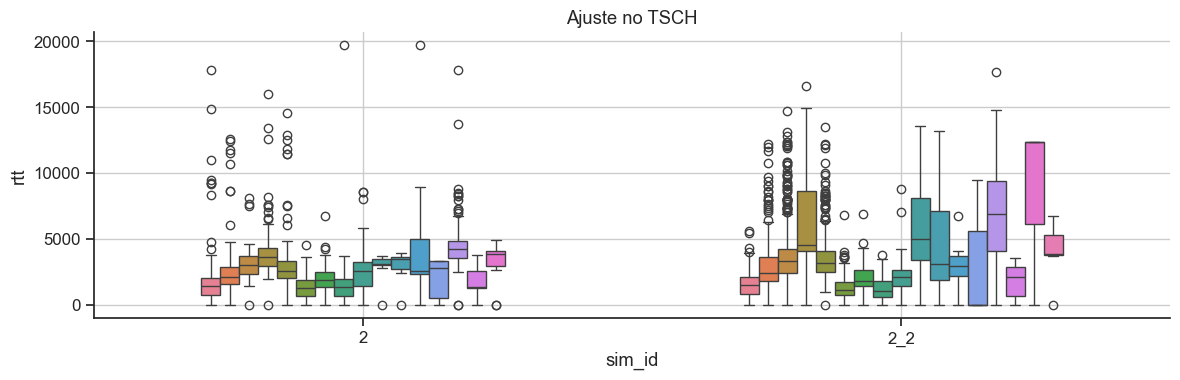

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns   # apenas para conveniência de estilo

sns.set_theme(style="ticks", font_scale=1.1)

fdf = data.query("type=='mob' and mac=='tsch' and sim_id in ['2','2_2']")

fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(
    data=fdf,
    x="sim_id", y="rtt_latency", hue="node",
    ax=ax, showcaps=True, width=.6
)
ax.set_title("Ajuste no TSCH")
ax.set_xlabel("sim_id")
ax.set_ylabel("rtt")
ax.get_legend().remove()
ax.grid()
sns.despine(ax=ax)
fig.tight_layout()
